In [1]:
# %% #### Imports ####
import pandas as pd
import seaborn as sns
import json
from HSSL import *
from scipy.cluster.hierarchy import cophenet
from scipy.stats import spearmanr, pearsonr
from benchmark.results import load_all_results

/mnt/large_storage/cabi/hnsw_searchers/HSSL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def is_pareto_efficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1) | np.all(costs[is_efficient] == c, axis=1)
            is_efficient[i] = True
    return is_efficient

In [3]:
def get_pareto_frontier(df, x, y, split):
    # removes all rows that don't lie on the pareto frontier
    to_plot = df.sort_values(x, ascending=True).reset_index(drop=True)
    d = {} # store last x values
    drop_list = []
    for algo in set(df[split]):
        d[algo] = 0
    for i in range(len(to_plot)):
        x_ = to_plot.iloc[i][x]
        y_ = to_plot.iloc[i][y]
        algo = to_plot.iloc[i][split]
        if y_ > d[algo]:
            d[algo] = y_
        else:
            drop_list.append(i)
    to_plot.drop(drop_list, inplace=True)
        
    return to_plot

In [4]:
df_ALOIhssl = pd.read_csv("ALOIhssl.csv")
df_ALOIkruskal = pd.read_csv("ALOIkruskal.csv")
df_ALOImst = pd.read_csv("ALOImst.csv")
df_MNISThssl = pd.read_csv("MNISThssl.csv")
df_MNISTkruskal = pd.read_csv("MNISTkruskal.csv")
df_MNISTmst = pd.read_csv("MNISTmst.csv")


In [5]:
df_ALOIhssl.sort_values(["time", "ef"])
print(df_ALOIhssl[df_ALOIhssl.time == df_ALOIhssl.time.min()])
print(df_ALOIhssl[df_ALOIhssl["Pearson correlation"] == df_ALOIhssl["Pearson correlation"].max()])

        algo        time       n  Pearson correlation  pval  ef  \
33  HNSWhssl  123.748304  110000             0.764114   0.0   5   

    max_build_heap_size  lowest_max_degree  
33                  200                 14  
        algo        time       n  Pearson correlation  pval  ef  \
62  HNSWhssl  780.914495  110000             0.990224   0.0   5   

    max_build_heap_size  lowest_max_degree  
62                   42                100  


In [6]:
df_ALOIhssl = df_ALOIhssl[["algo", "time", "Pearson correlation", "ef", "max_build_heap_size", "lowest_max_degree"]]

# filtered_df = df_MNISThssl[df_MNISThssl["Pearson correlation"] > 0.9]
# print(filtered_df.sort_values(["time", "ef", "max_build_heap_size", "lowest_max_degree"]))
# costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))


# mask = is_pareto_efficient(costs)
# pareto_df = filtered_df[mask]

# top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

pareto_aloihssl = get_pareto_frontier(df_ALOIhssl, "time", "Pearson correlation", "algo")

pareto_aloihssl[["time", "Pearson correlation", "ef", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  ef  max_build_heap_size  \
0   123.748304             0.764114   5                  200   
1   124.383454             0.797614   5                   71   
11  214.661385             0.805665   5                   25   
25  418.530795             0.970624   5                   25   
49  780.914495             0.990224   5                   42   

    lowest_max_degree  
0                  14  
1                  14  
11                 26  
25                 51  
49                100

In [7]:
df_ALOIkruskal = df_ALOIkruskal[["algo", "time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

# filtered_df = df_MNISThssl[df_MNISThssl["Pearson correlation"] > 0.9]
# print(filtered_df.sort_values(["time", "ef", "max_build_heap_size", "lowest_max_degree"]))
# costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))


# mask = is_pareto_efficient(costs)
# pareto_df = filtered_df[mask]

# top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

pareto_aloikruskal = get_pareto_frontier(df_ALOIkruskal, "time", "Pearson correlation", "algo")

pareto_aloikruskal[["time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  max_build_heap_size  lowest_max_degree
0   15.971175             0.665975                   71                 14
1   16.282973             0.675891                  119                 14
3   18.047087             0.691931                   25                 14
4   18.643841             0.727815                   42                 14
18  32.216799             0.844881                   42                100

In [8]:
df_ALOImst = df_ALOImst[["algo", "time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

# filtered_df = df_MNISThssl[df_MNISThssl["Pearson correlation"] > 0.9]
# print(filtered_df.sort_values(["time", "ef", "max_build_heap_size", "lowest_max_degree"]))
# costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))


# mask = is_pareto_efficient(costs)
# pareto_df = filtered_df[mask]

# top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

pareto_aloimst = get_pareto_frontier(df_ALOImst, "time", "Pearson correlation", "algo")

pareto_aloimst[["time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  max_build_heap_size  lowest_max_degree
0   0.933011             0.647832                   71                 14
1   1.030961             0.693125                   42                 14
9   1.849591             0.805789                   25                 51
16  3.252849             0.818970                   42                100
17  5.054536             0.885748                   71                100

In [9]:
df_MNISThssl = df_MNISThssl[["algo", "time", "Pearson correlation", "ef", "max_build_heap_size", "lowest_max_degree"]]

# filtered_df = df_MNISThssl[df_MNISThssl["Pearson correlation"] > 0.9]
# print(filtered_df.sort_values(["time", "ef", "max_build_heap_size", "lowest_max_degree"]))
# costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))


# mask = is_pareto_efficient(costs)
# pareto_df = filtered_df[mask]

# top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

pareto_mnisthssl = get_pareto_frontier(df_MNISThssl, "time", "Pearson correlation", "algo")

pareto_mnisthssl[["time", "Pearson correlation", "ef", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation   ef  max_build_heap_size  \
0     88.058956             0.824727    5                   25   
1     90.554401             0.888311    5                   42   
2     93.011402             0.902876    5                   71   
3     94.512890             0.933050    5                  119   
4     96.342225             0.948961    5                  200   
8    128.060049             0.948981   11                  200   
11   165.859941             0.959402    5                   71   
13   175.154705             0.964754    5                  119   
14   178.046517             0.967929    5                  200   
24   207.902990             0.969490   11                  200   
28   272.798102             0.984000    5                   25   
34   322.825330             0.985007   11                   25   
41   365.230038             0.986762    5                   25   
46   390.293014             0.992245   11                   25   
69   712.559257             0.993176    5                   71   
89  1135.981179             0.994213  100                   25   
98  1930.824753             0.996311  100                   71   

    lowest_max_degree  
0                  14  
1                  14  
2                  14  
3                  14  
4                  14  
8                  14  
11                 26  
13                 26  
14                 26  
24                 26  
28                 51  
34                 51  
41                100  
46                100  
69                100  
89                 51  
98                100

In [10]:
df_MNISTkruskal = df_MNISTkruskal[["algo", "time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

# filtered_df = df_MNISThssl[df_MNISThssl["Pearson correlation"] > 0.9]
# print(filtered_df.sort_values(["time", "ef", "max_build_heap_size", "lowest_max_degree"]))
# costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))


# mask = is_pareto_efficient(costs)
# pareto_df = filtered_df[mask]

# top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

pareto_mnistkruskal = get_pareto_frontier(df_MNISTkruskal, "time", "Pearson correlation", "algo")

pareto_mnistkruskal[["time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  max_build_heap_size  lowest_max_degree
0   11.656641             0.899496                  119                 14
1   12.042342             0.916254                  200                 14
7   15.604385             0.924016                   71                 26
8   16.261517             0.931142                  119                 26
10  18.178605             0.949096                   25                 51
11  18.690825             0.954915                   42                 51
12  19.739673             0.971318                   25                100

In [11]:
df_MNISTmst = df_MNISTmst[["algo", "time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

# filtered_df = df_MNISThssl[df_MNISThssl["Pearson correlation"] > 0.9]
# print(filtered_df.sort_values(["time", "ef", "max_build_heap_size", "lowest_max_degree"]))
# costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))


# mask = is_pareto_efficient(costs)
# pareto_df = filtered_df[mask]

# top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

pareto_mnistmst = get_pareto_frontier(df_MNISTmst, "time", "Pearson correlation", "algo")

pareto_mnistmst[["time", "Pearson correlation", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  max_build_heap_size  lowest_max_degree
0   1.027390             0.761979                   25                 14
1   1.305808             0.847858                   42                 14
2   1.541985             0.869867                   71                 14
3   1.623694             0.883228                   25                 26
4   1.937716             0.897458                  119                 14
5   2.035222             0.909621                   42                 26
6   2.212674             0.919928                   71                 26
7   2.386180             0.956757                   25                 51
10  3.064157             0.961647                   25                100
15  4.312558             0.965642                   42                100
17  6.026287             0.972710                   71                100

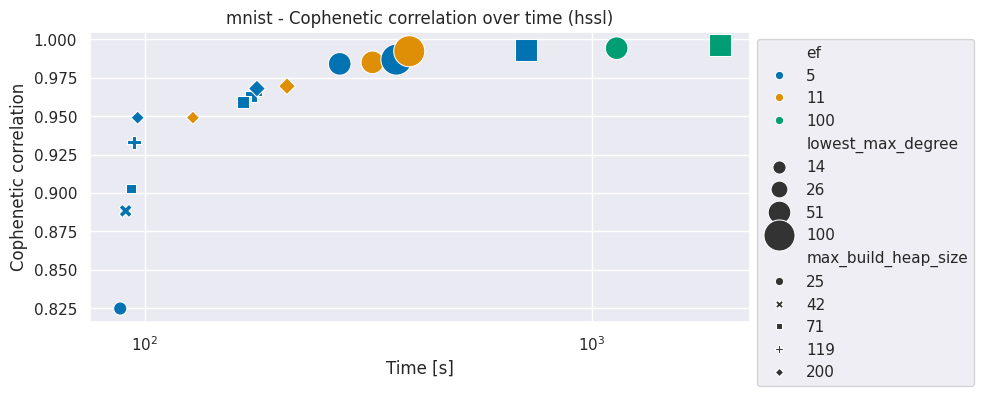

In [12]:
#plot_df["ef < 47"] = plot_df["ef"] < 47
#plot_df["max_build_heap_size < 42"] = plot_df["max_build_heap_size"] < 42
#plot_df["lowest_max_degree <= 72"] = plot_df["lowest_max_degree"] <= 72


sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 4))

sns.scatterplot(data=pareto_mnisthssl, x="time", y="Pearson correlation", 
                hue="ef",
                style="max_build_heap_size", 
                size="lowest_max_degree", 
                palette="colorblind", 
                # markers={True: "X", False: "o"},
                sizes=(90, 500))

plt.title(f"mnist - Cophenetic correlation over time (hssl)")
plt.xlabel("Time [s]")
plt.ylabel("Cophenetic correlation")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.xscale("log")

plt.show()

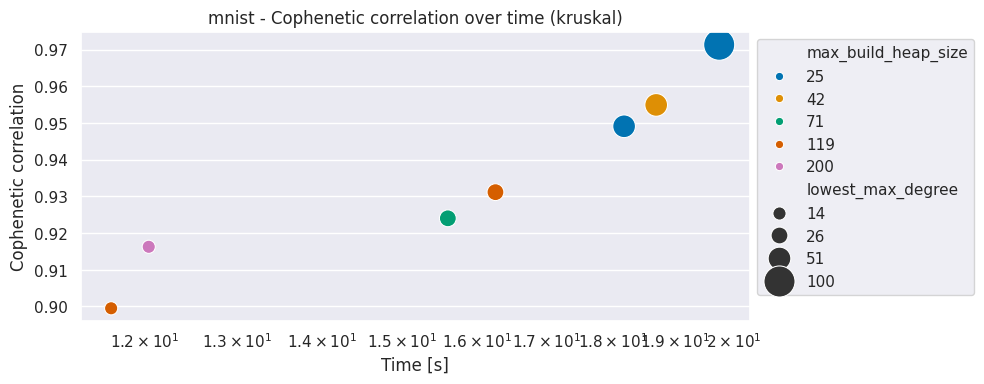

In [13]:
#plot_df["ef < 47"] = plot_df["ef"] < 47
#plot_df["max_build_heap_size < 42"] = plot_df["max_build_heap_size"] < 42
#plot_df["lowest_max_degree <= 72"] = plot_df["lowest_max_degree"] <= 72


sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 4))

sns.scatterplot(data=pareto_mnistkruskal, x="time", y="Pearson correlation", 
                hue="max_build_heap_size",
                size="lowest_max_degree",
                palette="colorblind", 
                # markers={True: "X", False: "o"},
                sizes=(90, 500))

plt.title(f"mnist - Cophenetic correlation over time (kruskal)")
plt.xlabel("Time [s]")
plt.ylabel("Cophenetic correlation")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.xscale("log")

plt.show()

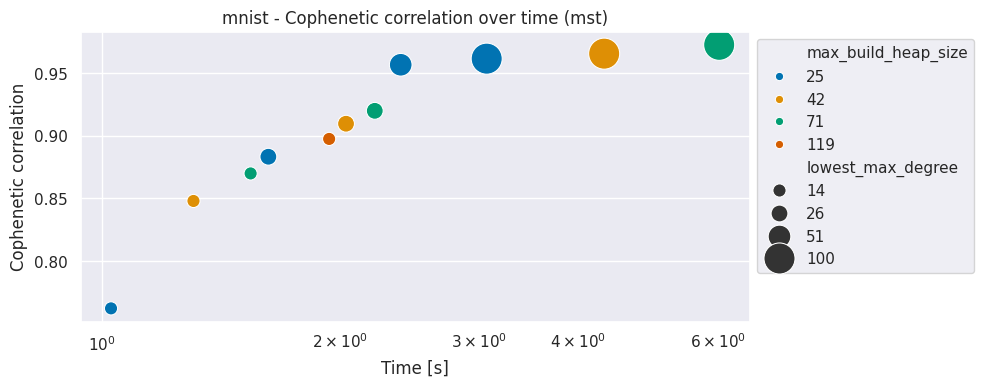

In [14]:
#plot_df["ef < 47"] = plot_df["ef"] < 47
#plot_df["max_build_heap_size < 42"] = plot_df["max_build_heap_size"] < 42
#plot_df["lowest_max_degree <= 72"] = plot_df["lowest_max_degree"] <= 72


sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 4))

sns.scatterplot(data=pareto_mnistmst, x="time", y="Pearson correlation", 
                hue="max_build_heap_size",
                size="lowest_max_degree",
                palette="colorblind", 
                # markers={True: "X", False: "o"},
                sizes=(90, 500))

plt.title(f"mnist - Cophenetic correlation over time (mst)")
plt.xlabel("Time [s]")
plt.ylabel("Cophenetic correlation")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.xscale("log")

plt.show()

## HNSW hssl

In [15]:
datasets, min_cluster_size, k_override = ['blobs-32k-10-5'], 50, None
# datasets, min_cluster_size, k_override = ['blobs-32k-5-100'], 50, None
# datasets, min_cluster_size, k_override = ['aloi-50k'], 1, 1000
# datasets, min_cluster_size, k_override = ['mnist-70k'], 10, None
# datasets, min_cluster_size, k_override = ['pamap2-100k'], 50, None

data = []
exact_data = {}


for dataset in datasets:
    for f in load_all_results(dataset, ""):
        try:
            if f.attrs['algo'] == 'scipy':
                exact_data[dataset] = f["dendrogram"][:]
                break
        finally:
            f.close()


for dataset in datasets:
    # load all the results that are available for the dataset
    for f in load_all_results(dataset, ""):
        if f.attrs['algo'] == "HNSWhssl":
            try:
                ARI = ARI_score(exact_data[dataset], f["dendrogram"][:], min_cluster_size=min_cluster_size, k_override=k_override)
                data.append({
                "algo": f.attrs['algo'],
                "time": f.attrs['time'],
                "n": len(f["dendrogram"][:]) + 1,
                "params": f.attrs["params"],
                "ARI": ARI
                })
            finally:
                f.close()

df = pd.DataFrame(data=data)
df

algo        time      n  \
0   HNSWhssl  445.016544  32000   
1   HNSWhssl  350.248732  32000   
2   HNSWhssl  143.497769  32000   
3   HNSWhssl  612.631667  32000   
4   HNSWhssl  180.349855  32000   
5   HNSWhssl  334.208968  32000   
6   HNSWhssl  210.319201  32000   
7   HNSWhssl  503.453785  32000   
8   HNSWhssl  510.798531  32000   
9   HNSWhssl  248.105161  32000   
10  HNSWhssl  298.329633  32000   
11  HNSWhssl  166.864243  32000   
12  HNSWhssl  154.656487  32000   
13  HNSWhssl  238.424818  32000   
14  HNSWhssl  176.769572  32000   

                                               params       ARI  
0   {"ef": 47, "params": {"higher_max_degree": 50,...  0.337589  
1   {"ef": 47, "params": {"higher_max_degree": 50,...  0.757562  
2   {"ef": 5, "params": {"higher_max_degree": 36, ...  0.769072  
3   {"ef": 100, "params": {"higher_max_degree": 50...  0.698535  
4   {"ef": 22, "params": {"higher_max_degree": 36,...  1.000000  
5   {"ef": 47, "params": {"higher_max_degree": 36,...  0.569351  
6   {"ef": 22, "params": {"higher_max_degree": 50,...  0.994130  
7   {"ef": 100, "params": {"higher_max_degree": 50...  0.999883  
8   {"ef": 100, "params": {"higher_max_degree": 36...  0.999922  
9   {"ef": 11, "params": {"higher_max_degree": 50,...  1.000000  
10  {"ef": 22, "params": {"higher_max_degree": 50,...  0.654829  
11  {"ef": 5, "params": {"higher_max_degree": 50, ...  0.575607  
12  {"ef": 11, "params": {"higher_max_degree": 36,...  0.780906  
13  {"ef": 5, "params": {"higher_max_degree": 50, ...  0.659219  
14  {"ef": 11, "params": {"higher_max_degree": 50,...  0.765581

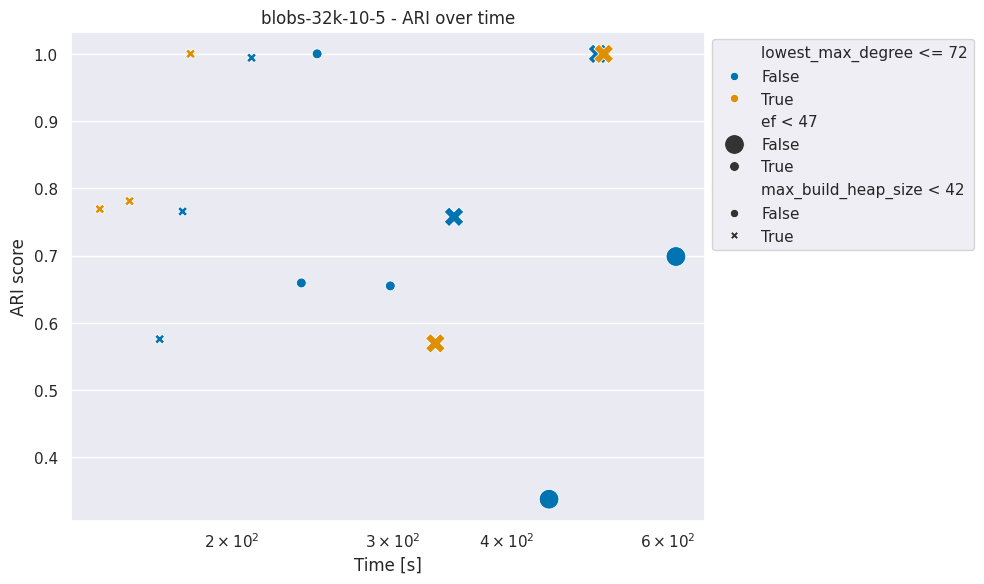

In [16]:
df["params_dict"] = df["params"].apply(lambda x: json.loads(x))
df_ef = df["params_dict"].apply(lambda d: d.get("ef")).rename("ef").to_frame()
df_params = df["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
plot_df = pd.concat([df, df_ef[['ef']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

if 0: # --Aloi--
    plot_df["ef <= 42"] = plot_df["ef"] <= 42
    plot_df["max_build_heap_size < 119"] = plot_df["max_build_heap_size"] < 119
    plot_df["lowest_max_degree <= 20"] = plot_df["lowest_max_degree"] <= 20


    sns.set(style="darkgrid")
    ax = plt.figure(figsize=(10, 6))

    sns.scatterplot(data=plot_df, x="time", y="ARI", 
                    hue="lowest_max_degree <= 20",
                    style="max_build_heap_size < 119", 
                    size="ef <= 42", 
                    palette="colorblind", 
                    # markers={True: "X", False: "o"},
                    sizes=(50, 200))
if 1: # --Blobs-10-5--
    plot_df["ef < 47"] = plot_df["ef"] < 47
    plot_df["max_build_heap_size < 42"] = plot_df["max_build_heap_size"] < 42
    plot_df["lowest_max_degree <= 72"] = plot_df["lowest_max_degree"] <= 72


    sns.set(style="darkgrid")
    ax = plt.figure(figsize=(10, 6))

    sns.scatterplot(data=plot_df, x="time", y="ARI", 
                    hue="lowest_max_degree <= 72",
                    style="max_build_heap_size < 42", 
                    size="ef < 47", 
                    palette="colorblind", 
                    # markers={True: "X", False: "o"},
                    sizes=(50, 200))

plt.title(f"{dataset} - ARI over time")
plt.xlabel("Time [s]")
plt.ylabel("ARI score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.xscale("log")

plt.show()

In [17]:
# plot_df[plot_df["ARI"] > 0.97].nsmallest(10, 'time')[["time", "ARI", "ef","max_build_heap_size", "lowest_max_degree"]]

In [18]:
filtered_df = plot_df[plot_df["ARI"] > 0.95]
costs = np.column_stack((-filtered_df["ARI"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

# print(costs)

top_5_pareto = pareto_df.head(5)

top_5_pareto[["time", "ARI", "ef", "max_build_heap_size", "lowest_max_degree"]]

time  ARI  ef  max_build_heap_size  lowest_max_degree
4  180.349855  1.0  22                   25                 72

### Ablation study

gt_coph_dist took: 104.57233762741089s
coph_dist took: 106.48147869110107s


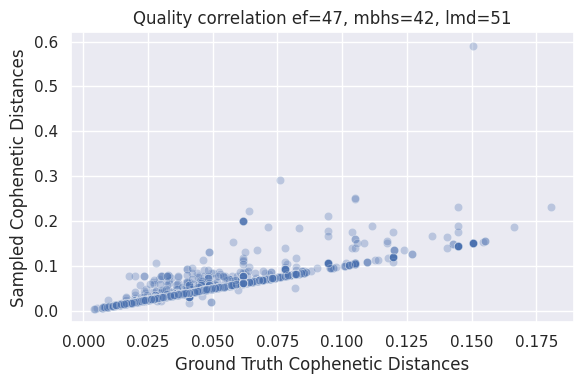

pearsonr took: 0.45603132247924805s
coph_dist took: 155.54290986061096s


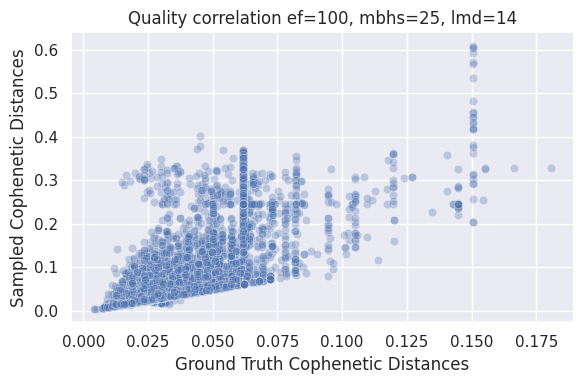

pearsonr took: 0.43599772453308105s
coph_dist took: 110.38804650306702s


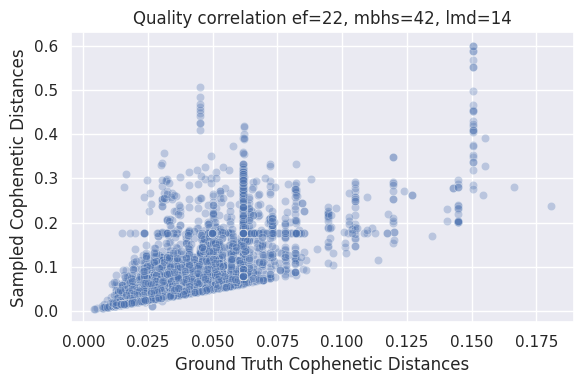

pearsonr took: 0.4217195510864258s
coph_dist took: 143.94966673851013s


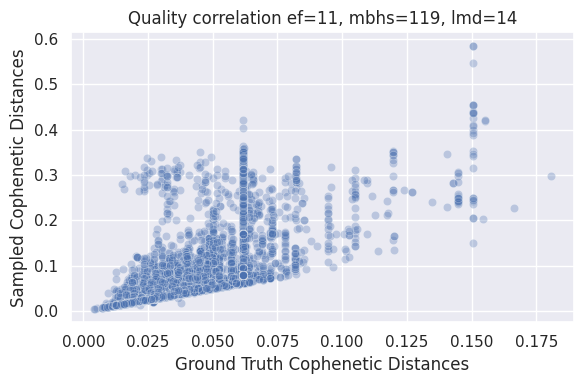

pearsonr took: 0.42219972610473633s
coph_dist took: 117.6790018081665s


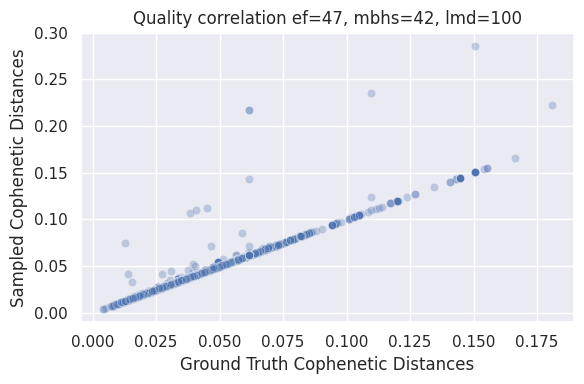

pearsonr took: 0.42118310928344727s
coph_dist took: 139.28339409828186s


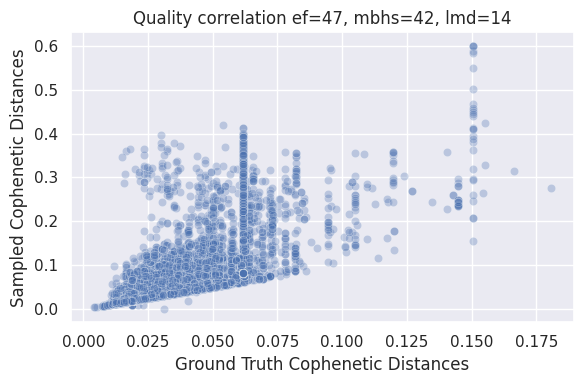

pearsonr took: 0.42351603507995605s
coph_dist took: 116.0321044921875s


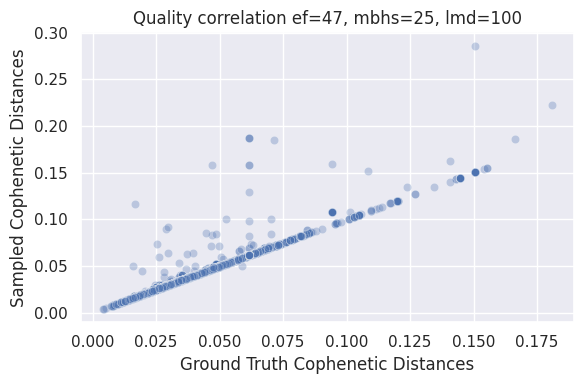

pearsonr took: 0.4192838668823242s
coph_dist took: 136.9113471508026s


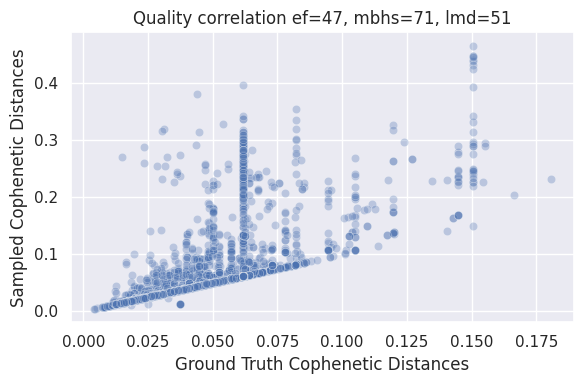

pearsonr took: 0.41822361946105957s
coph_dist took: 115.5037739276886s


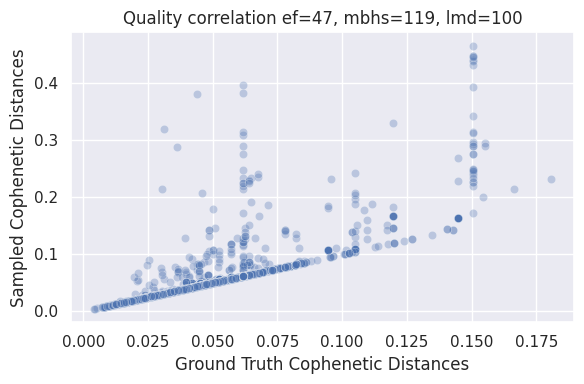

pearsonr took: 0.418168306350708s
coph_dist took: 138.41519403457642s


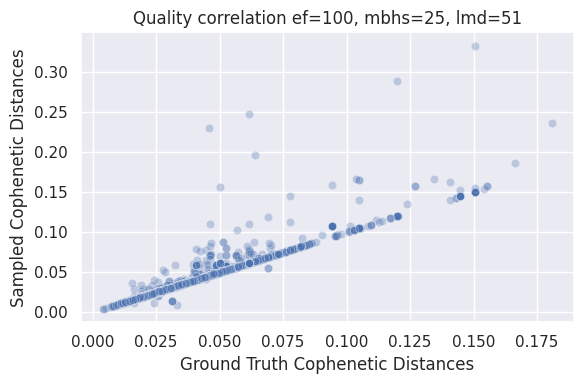

pearsonr took: 0.44723033905029297s
coph_dist took: 122.00781917572021s
pearsonr took: 0.44649577140808105s
coph_dist took: 144.59107875823975s
pearsonr took: 0.44591784477233887s
coph_dist took: 122.61346054077148s
pearsonr took: 0.45434045791625977s
coph_dist took: 130.1497287750244s
pearsonr took: 0.4433283805847168s
coph_dist took: 113.99357008934021s
pearsonr took: 0.44481325149536133s
coph_dist took: 111.10894989967346s
pearsonr took: 0.44597625732421875s
coph_dist took: 111.2345962524414s
pearsonr took: 0.44403624534606934s
coph_dist took: 111.31709122657776s
pearsonr took: 0.4446530342102051s
coph_dist took: 108.88212203979492s
pearsonr took: 0.443941593170166s
coph_dist took: 114.46346712112427s
pearsonr took: 0.44157910346984863s
coph_dist took: 107.3444230556488s
pearsonr took: 0.4452805519104004s
coph_dist took: 107.20689368247986s
pearsonr took: 0.44451141357421875s
coph_dist took: 106.91468548774719s
pearsonr took: 0.44354796409606934s
coph_dist took: 108.83804488182068s


algo         time       n  \
0  HNSWhssl  1471.691165  110000   
1  HNSWhssl   820.096500  110000   
2  HNSWhssl   215.523382  110000   
3  HNSWhssl   139.965958  110000   
4  HNSWhssl  1993.949497  110000   

                                              params  Pearson correlation  \
0  {"ef": 47, "params": {"higher_max_degree": 25,...             0.932830   
1  {"ef": 100, "params": {"higher_max_degree": 7,...             0.781215   
2  {"ef": 22, "params": {"higher_max_degree": 7, ...             0.778511   
3  {"ef": 11, "params": {"higher_max_degree": 7, ...             0.734722   
4  {"ef": 47, "params": {"higher_max_degree": 50,...             0.984933   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [19]:
## -- aloi-hssl -- ##
import time
import itertools

dataset = 'aloi733-110k'

ef = [5, 11, 22, 47, 100]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

combinations = list(itertools.product(ef, mbhs, lmd))

data = []


for f in load_all_results(dataset, ""):
    try:
        if f.attrs['algo'] != 'scipy': continue
        gt_dendro = f["dendrogram"][:]
        gt_dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in gt_dendro]
        gt_dendro = elki_sort_dendrogram(gt_dendro)
        start = time.time()
        gt_coph_dists = cophenet(gt_dendro)
        end = time.time()
        t = end - start
        print(f"gt_coph_dist took: {t}s")
    finally:
        f.close()

indices = np.random.choice(gt_coph_dists.shape[0], size=10_000_000, replace=False)

temp = 0
for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWhssl": continue
    params = json.loads(f.attrs["params"])
    
    if (params['ef'], 
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        temp += 1
        if temp <= 10:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=sampled_gt_coph_dists[0:10000], y=sampled_coph_dists[0:10000], alpha=0.3)
            plt.title(f"Quality correlation ef={params['ef']}, mbhs={params['params']['max_build_heap_size']}, lmd={params['params']['lowest_max_degree']}")
            plt.xlabel("Ground Truth Cophenetic Distances")
            plt.ylabel("Sampled Cophenetic Distances")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_ALOIhssl = pd.DataFrame(data=data)
df_ALOIhssl.head(5)

coph_dist took: 97.82498860359192s


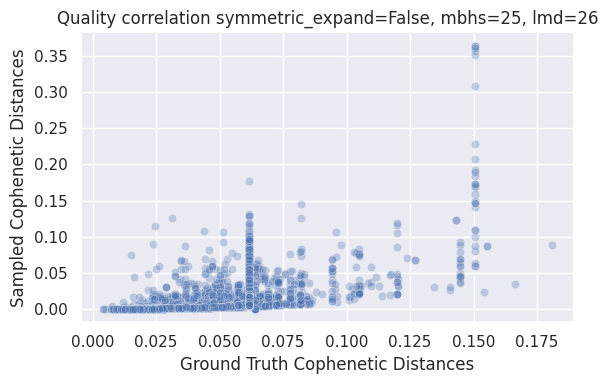

pearsonr took: 0.42873716354370117s
coph_dist took: 97.13637399673462s


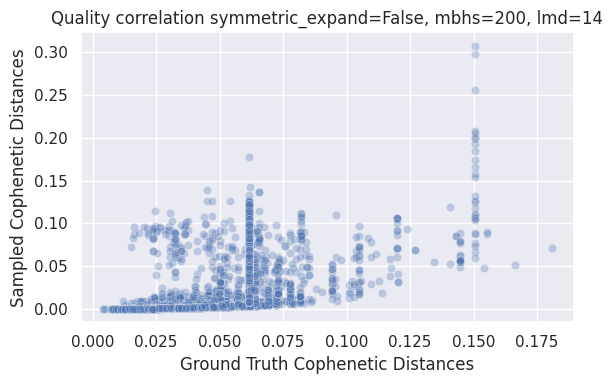

pearsonr took: 0.4279601573944092s
coph_dist took: 96.76234793663025s


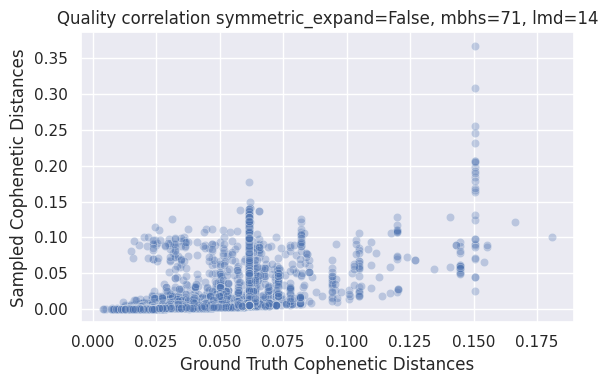

pearsonr took: 0.42873406410217285s
coph_dist took: 99.01642894744873s


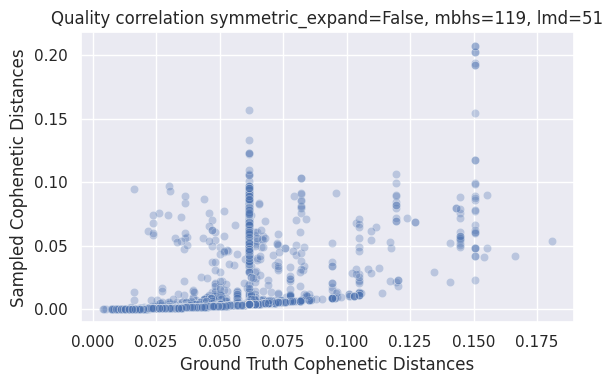

pearsonr took: 0.42774534225463867s
coph_dist took: 96.95144557952881s


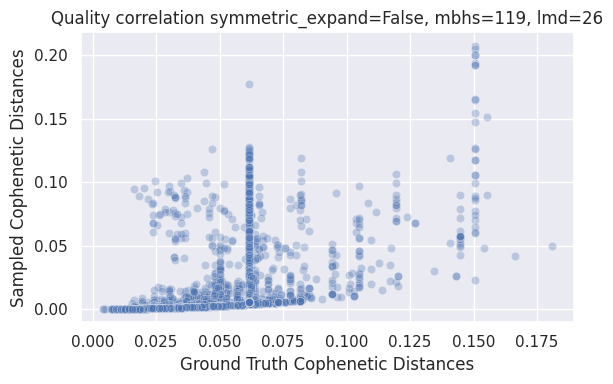

pearsonr took: 0.4295048713684082s
coph_dist took: 97.08184456825256s


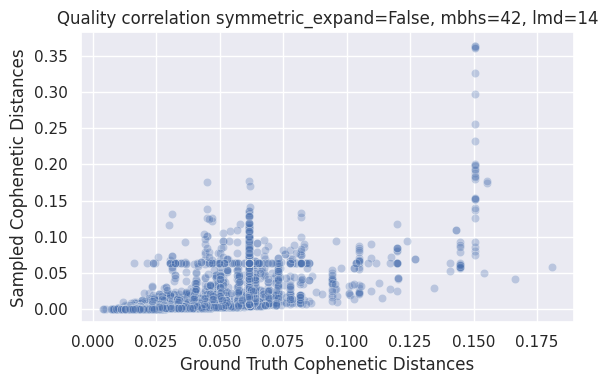

pearsonr took: 0.429689884185791s
coph_dist took: 96.65195322036743s


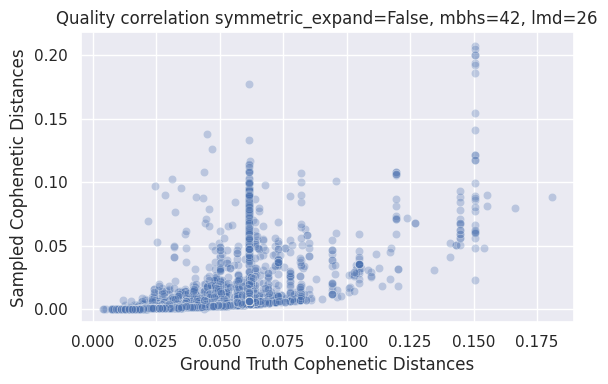

pearsonr took: 0.47025632858276367s
coph_dist took: 96.9486083984375s


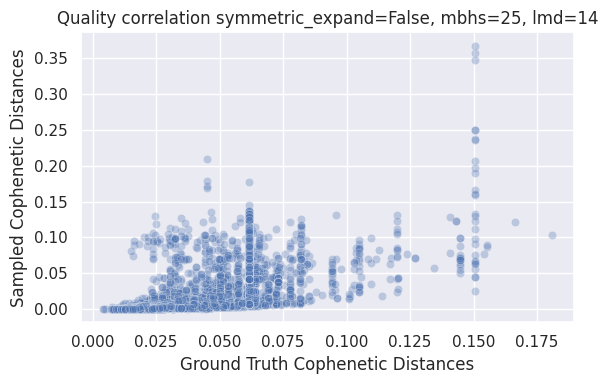

pearsonr took: 0.42978382110595703s
coph_dist took: 99.42881774902344s


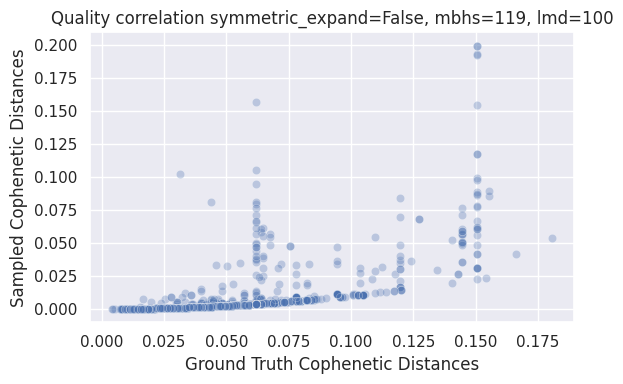

pearsonr took: 0.4298059940338135s
coph_dist took: 99.29396486282349s


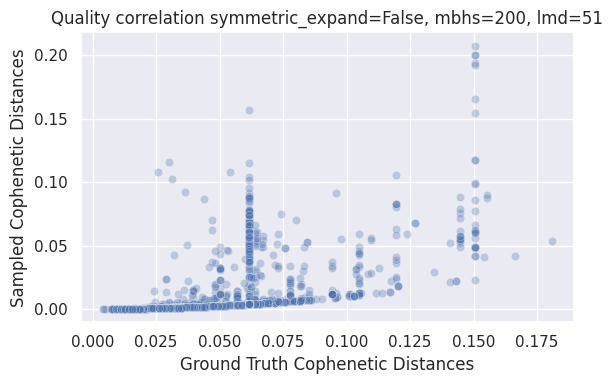

pearsonr took: 0.4290425777435303s
coph_dist took: 96.89256811141968s
pearsonr took: 0.427295446395874s
coph_dist took: 109.62933397293091s
pearsonr took: 0.4392056465148926s
coph_dist took: 99.7061550617218s
pearsonr took: 0.4279944896697998s
coph_dist took: 99.661306142807s
pearsonr took: 0.42827486991882324s
coph_dist took: 99.38817644119263s
pearsonr took: 0.42652392387390137s
coph_dist took: 96.83501529693604s
pearsonr took: 0.4283607006072998s
coph_dist took: 97.11857056617737s
pearsonr took: 0.427091121673584s
coph_dist took: 99.62339544296265s
pearsonr took: 0.4279656410217285s
coph_dist took: 99.62073397636414s
pearsonr took: 0.42764878273010254s
coph_dist took: 99.6635639667511s
pearsonr took: 0.4269223213195801s


algo       time       n  \
0  HNSWkruskal  22.977436  110000   
1  HNSWkruskal  17.340520  110000   
2  HNSWkruskal  15.971175  110000   
3  HNSWkruskal  26.204120  110000   
4  HNSWkruskal  20.676146  110000   

                                              params  Pearson correlation  \
0  {"minPts": 1, "symmetric_expand": false, "para...             0.592812   
1  {"minPts": 1, "symmetric_expand": false, "para...             0.669486   
2  {"minPts": 1, "symmetric_expand": false, "para...             0.666040   
3  {"minPts": 1, "symmetric_expand": false, "para...             0.498165   
4  {"minPts": 1, "symmetric_expand": false, "para...             0.540276   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [20]:
## -- aloi-kruskal -- ##
import time
import itertools

dataset = 'aloi733-110k'

se = [False]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

# Generate all combinations
combinations = list(itertools.product(se, mbhs, lmd))

data = []


temp = 0
for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWkruskal": continue
    params = json.loads(f.attrs["params"])
    
    if (params['symmetric_expand'],
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        temp += 1
        if temp <= 10:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=sampled_gt_coph_dists[0:10000], y=sampled_coph_dists[0:10000], alpha=0.3)
            plt.title(f"Quality correlation symmetric_expand={params['symmetric_expand']}, mbhs={params['params']['max_build_heap_size']}, lmd={params['params']['lowest_max_degree']}")
            plt.xlabel("Ground Truth Cophenetic Distances")
            plt.ylabel("Sampled Cophenetic Distances")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_ALOIkruskal = pd.DataFrame(data=data)
df_ALOIkruskal.head(5)

coph_dist took: 96.96175479888916s


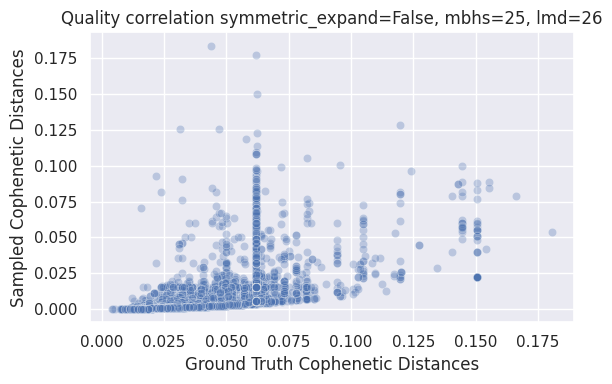

pearsonr took: 0.4288806915283203s
coph_dist took: 97.62518000602722s


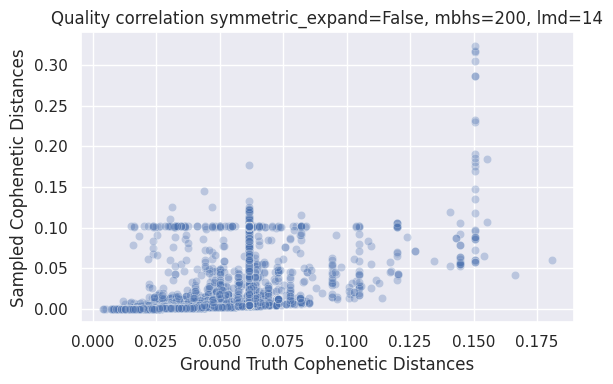

pearsonr took: 0.4298865795135498s
coph_dist took: 97.46195363998413s


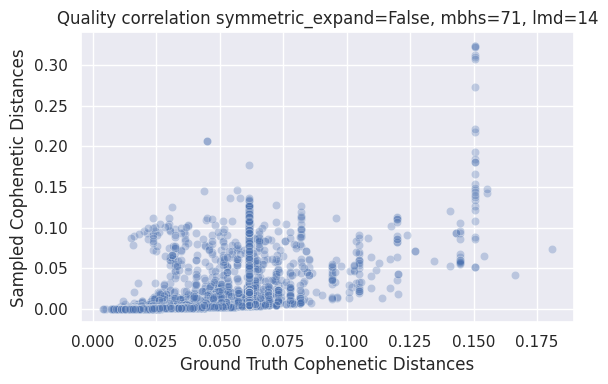

pearsonr took: 0.47719287872314453s
coph_dist took: 98.93817806243896s


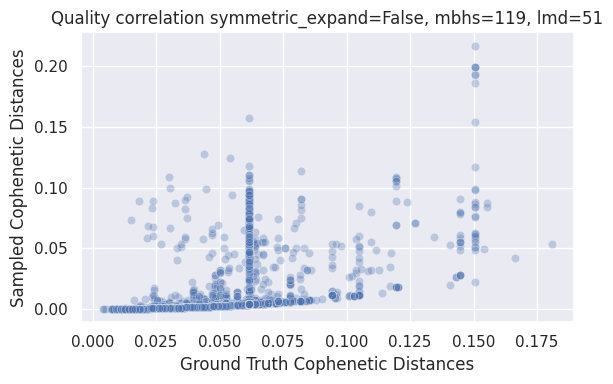

pearsonr took: 0.4260592460632324s
coph_dist took: 96.69280219078064s


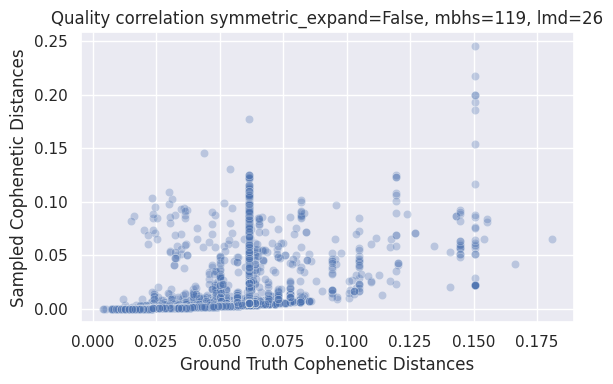

pearsonr took: 0.4277362823486328s
coph_dist took: 96.5078444480896s


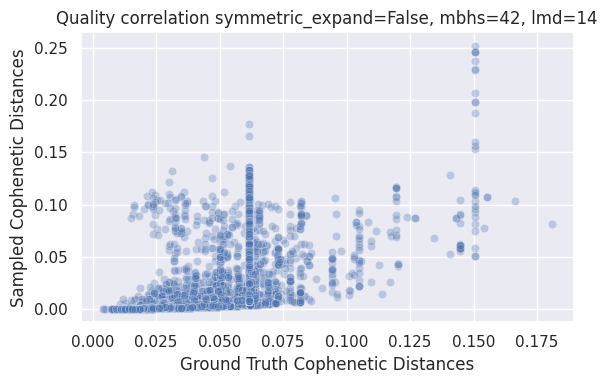

pearsonr took: 0.42737269401550293s
coph_dist took: 96.61304497718811s


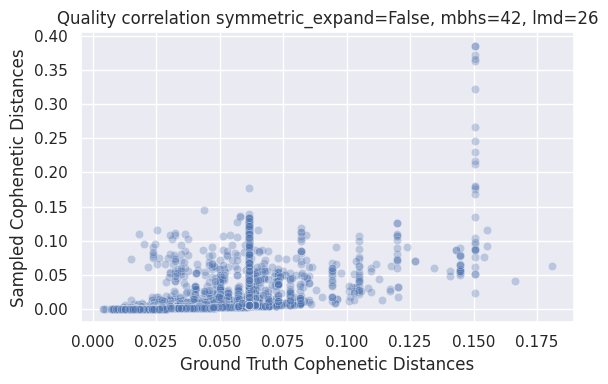

pearsonr took: 0.4268345832824707s
coph_dist took: 96.32804346084595s


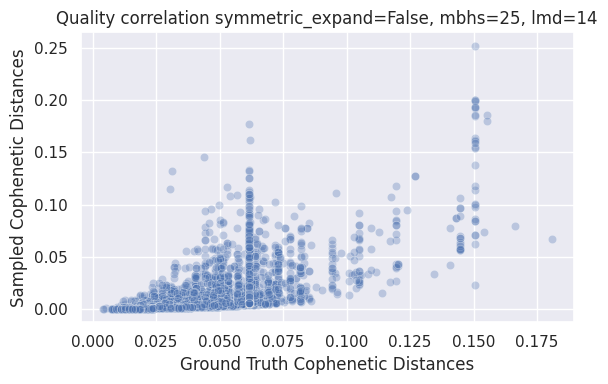

pearsonr took: 0.4263749122619629s
coph_dist took: 110.2553403377533s


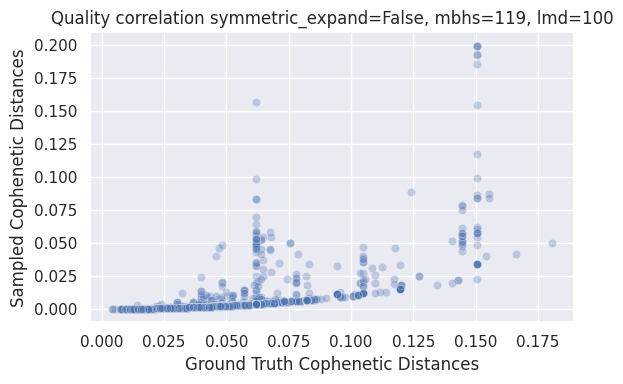

pearsonr took: 0.43889665603637695s
coph_dist took: 98.907870054245s


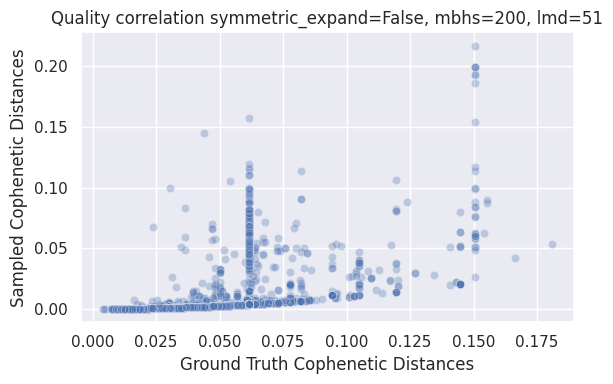

pearsonr took: 0.42679357528686523s
coph_dist took: 96.67585253715515s
pearsonr took: 0.4256722927093506s
coph_dist took: 99.04831957817078s
pearsonr took: 0.42493176460266113s
coph_dist took: 99.27687811851501s
pearsonr took: 0.42902421951293945s
coph_dist took: 99.3057107925415s
pearsonr took: 0.42680788040161133s
coph_dist took: 110.26122117042542s
pearsonr took: 0.4357178211212158s
coph_dist took: 107.97640252113342s
pearsonr took: 0.43596506118774414s
coph_dist took: 108.85113477706909s
pearsonr took: 0.4366645812988281s
coph_dist took: 110.60917043685913s
pearsonr took: 0.4396085739135742s
coph_dist took: 108.728355884552s
pearsonr took: 0.43778228759765625s
coph_dist took: 111.86487030982971s
pearsonr took: 0.43953895568847656s


algo      time       n  \
0  HNSWmst  1.349632  110000   
1  HNSWmst  1.542663  110000   
2  HNSWmst  0.933011  110000   
3  HNSWmst  2.942465  110000   
4  HNSWmst  1.668642  110000   

                                              params  Pearson correlation  \
0  {"minPts": 1, "symmetric_expand": false, "para...             0.602486   
1  {"minPts": 1, "symmetric_expand": false, "para...             0.585700   
2  {"minPts": 1, "symmetric_expand": false, "para...             0.648232   
3  {"minPts": 1, "symmetric_expand": false, "para...             0.496548   
4  {"minPts": 1, "symmetric_expand": false, "para...             0.541941   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [21]:
## -- aloi-mst -- ##
import time
import itertools

dataset = 'aloi733-110k'

se = [False]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

# Generate all combinations
combinations = list(itertools.product(se, mbhs, lmd))

data = []


temp = 0
for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWmst": continue
    params = json.loads(f.attrs["params"])
    
    if (params['symmetric_expand'],
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        temp += 1
        if temp <= 10:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=sampled_gt_coph_dists[0:10000], y=sampled_coph_dists[0:10000], alpha=0.3)
            plt.title(f"Quality correlation symmetric_expand={params['symmetric_expand']}, mbhs={params['params']['max_build_heap_size']}, lmd={params['params']['lowest_max_degree']}")
            plt.xlabel("Ground Truth Cophenetic Distances")
            plt.ylabel("Sampled Cophenetic Distances")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_ALOImst = pd.DataFrame(data=data)
df_ALOImst.head(5)

gt_coph_dist took: 42.37948203086853s
coph_dist took: 43.472896575927734s


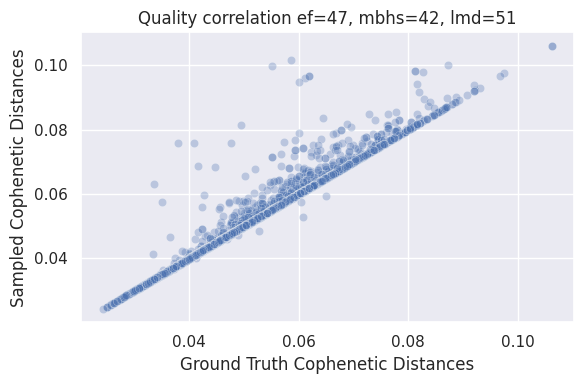

pearsonr took: 0.44133496284484863s
coph_dist took: 43.42989540100098s


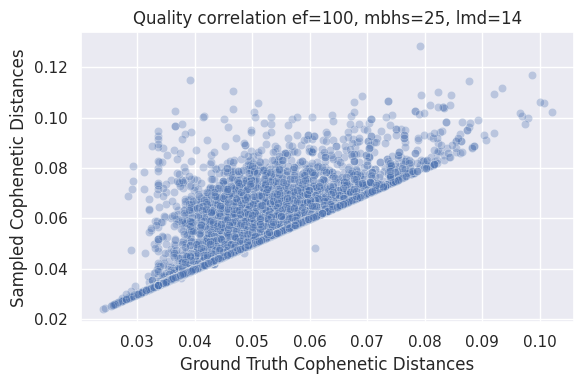

pearsonr took: 0.4407188892364502s
coph_dist took: 43.44754767417908s


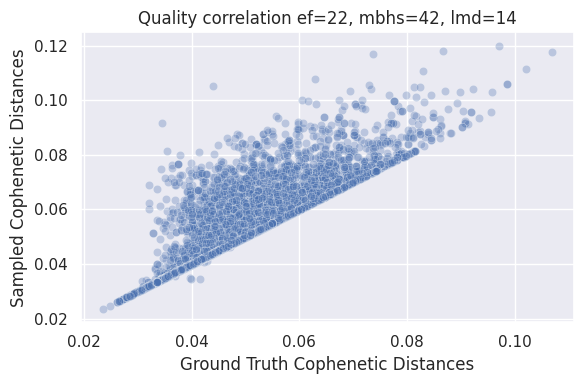

pearsonr took: 0.4411180019378662s
coph_dist took: 43.43667817115784s


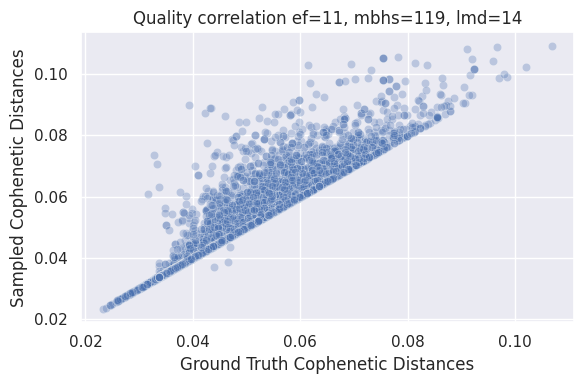

pearsonr took: 0.4420967102050781s
coph_dist took: 43.46333837509155s


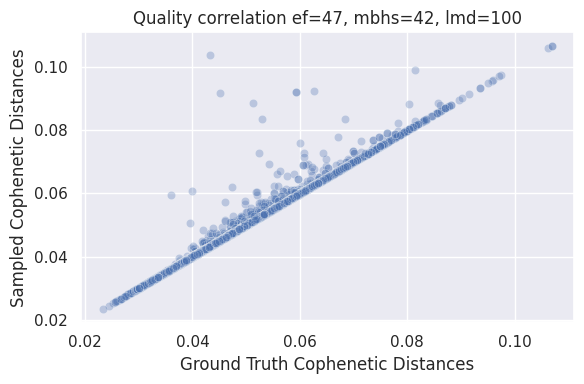

pearsonr took: 0.47815608978271484s
coph_dist took: 43.47819375991821s


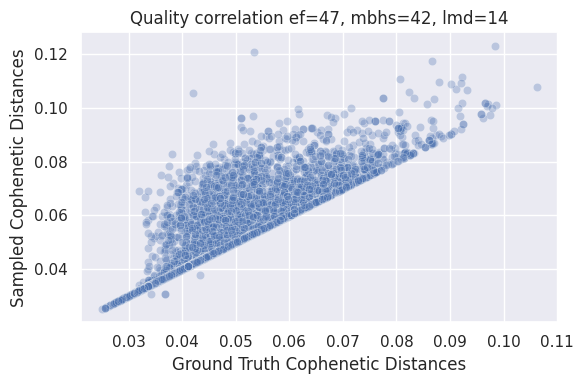

pearsonr took: 0.44145941734313965s
coph_dist took: 43.275362491607666s


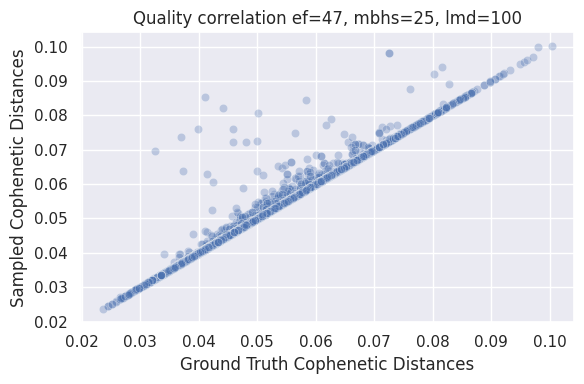

pearsonr took: 0.4429638385772705s
coph_dist took: 43.39069056510925s


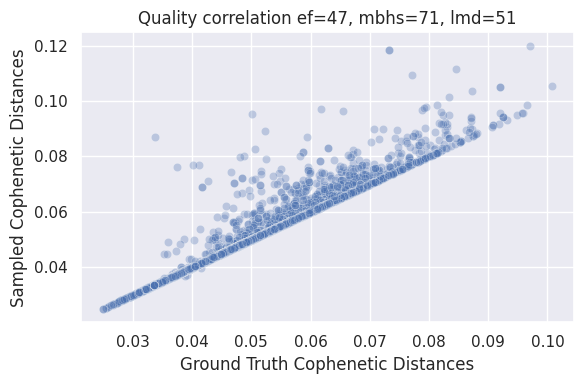

pearsonr took: 0.44521403312683105s
coph_dist took: 40.46873950958252s


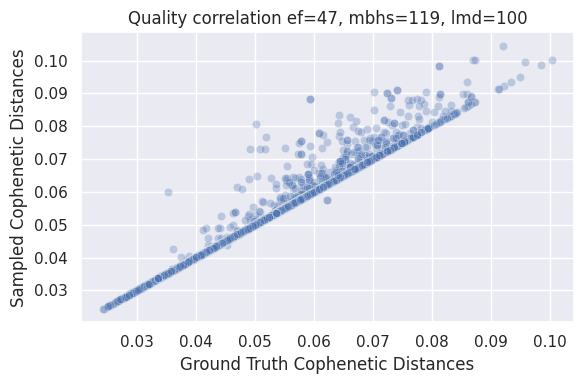

pearsonr took: 0.4316871166229248s
coph_dist took: 40.34291481971741s


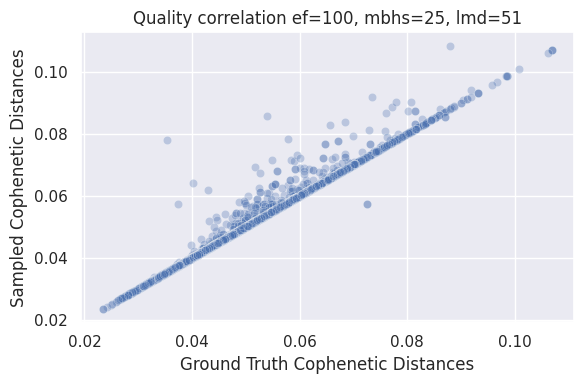

pearsonr took: 0.4331474304199219s
coph_dist took: 40.60792684555054s
pearsonr took: 0.43044590950012207s
coph_dist took: 40.415072202682495s
pearsonr took: 0.4307539463043213s
coph_dist took: 40.4545795917511s
pearsonr took: 0.43128490447998047s
coph_dist took: 40.444393157958984s
pearsonr took: 0.4321439266204834s
coph_dist took: 40.35837268829346s
pearsonr took: 0.4311339855194092s
coph_dist took: 40.440396308898926s
pearsonr took: 0.43147754669189453s
coph_dist took: 40.413822650909424s
pearsonr took: 0.432873010635376s
coph_dist took: 40.2710223197937s
pearsonr took: 0.43149328231811523s
coph_dist took: 40.52846312522888s
pearsonr took: 0.4316873550415039s
coph_dist took: 41.612077951431274s
pearsonr took: 0.44199085235595703s
coph_dist took: 41.39165663719177s
pearsonr took: 0.44273900985717773s
coph_dist took: 40.347596883773804s
pearsonr took: 0.4310767650604248s
coph_dist took: 42.273884296417236s
pearsonr took: 0.4368574619293213s
coph_dist took: 42.22607898712158s
pearsonr t

algo        time      n  \
0  HNSWhssl  745.273918  70000   
1  HNSWhssl  547.430516  70000   
2  HNSWhssl  183.726774  70000   
3  HNSWhssl  135.481977  70000   
4  HNSWhssl  922.316936  70000   

                                              params  Pearson correlation  \
0  {"ef": 47, "params": {"higher_max_degree": 25,...             0.987984   
1  {"ef": 100, "params": {"higher_max_degree": 7,...             0.817880   
2  {"ef": 22, "params": {"higher_max_degree": 7, ...             0.878490   
3  {"ef": 11, "params": {"higher_max_degree": 7, ...             0.934653   
4  {"ef": 47, "params": {"higher_max_degree": 50,...             0.993023   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [22]:
## -- mnist-hssl -- ##
import time
import itertools

dataset = 'mnist-70k'

ef = [5, 11, 22, 47, 100]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

combinations = list(itertools.product(ef, mbhs, lmd))

data = []


for f in load_all_results(dataset, ""):
    try:
        if f.attrs['algo'] != 'scipy': continue
        gt_dendro = f["dendrogram"][:]
        gt_dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in gt_dendro]
        gt_dendro = elki_sort_dendrogram(gt_dendro)
        start = time.time()
        gt_coph_dists = cophenet(gt_dendro)
        end = time.time()
        t = end - start
        print(f"gt_coph_dist took: {t}s")
    finally:
        f.close()
indices = np.random.choice(gt_coph_dists.shape[0], size=10_000_000, replace=False)

temp = 0
for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWhssl": continue
    params = json.loads(f.attrs["params"])
    
    if (params['ef'], 
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        indices = np.random.choice(coph_dists.shape[0], size=10_000_000, replace=False)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        temp += 1
        if temp <= 10:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=sampled_gt_coph_dists[0:10000], y=sampled_coph_dists[0:10000], alpha=0.3)
            plt.title(f"Quality correlation ef={params['ef']}, mbhs={params['params']['max_build_heap_size']}, lmd={params['params']['lowest_max_degree']}")
            plt.xlabel("Ground Truth Cophenetic Distances")
            plt.ylabel("Sampled Cophenetic Distances")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_MNISThssl = pd.DataFrame(data=data)
df_MNISThssl.head(5)

coph_dist took: 43.08864736557007s


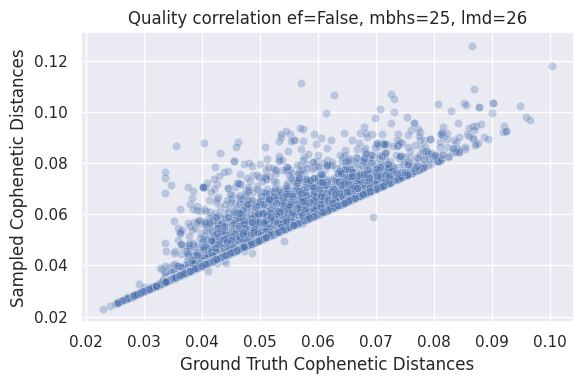

pearsonr took: 0.42638158798217773s
coph_dist took: 42.708932876586914s


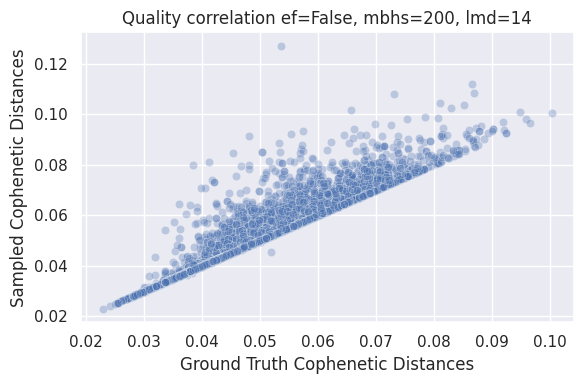

pearsonr took: 0.4249145984649658s
coph_dist took: 42.42002296447754s


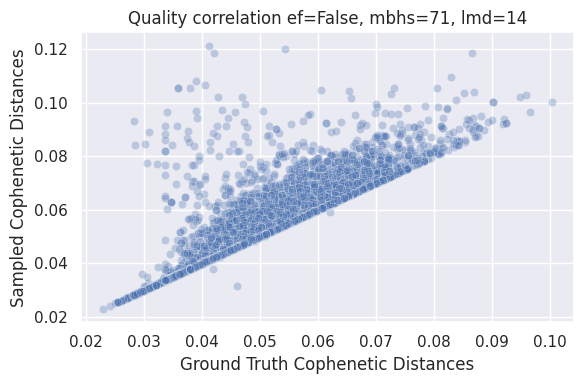

pearsonr took: 0.4176504611968994s
coph_dist took: 42.33086156845093s


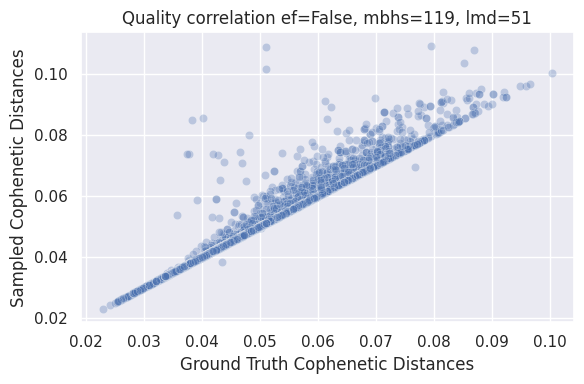

pearsonr took: 0.41809749603271484s
coph_dist took: 42.28935360908508s


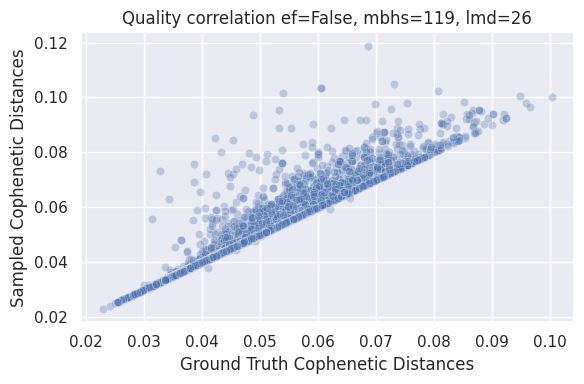

pearsonr took: 0.4146738052368164s
coph_dist took: 42.11089849472046s


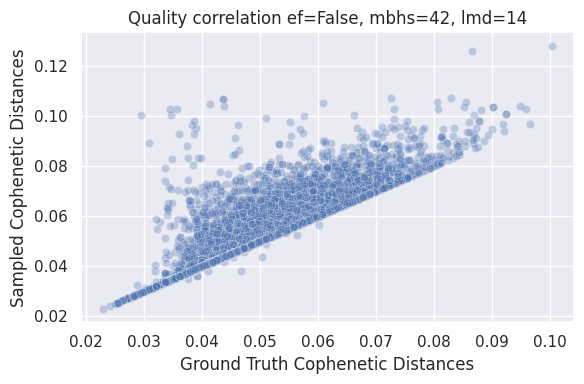

pearsonr took: 0.41512370109558105s
coph_dist took: 42.11689233779907s


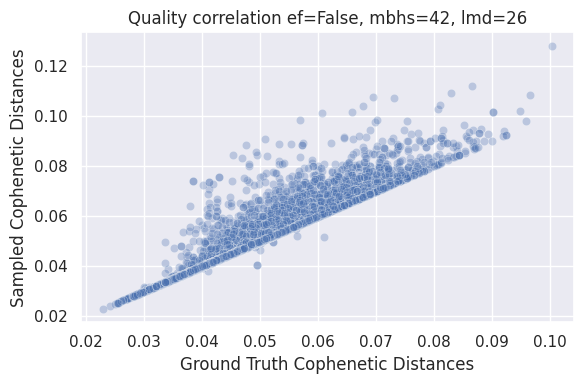

pearsonr took: 0.4151036739349365s
coph_dist took: 42.18549466133118s


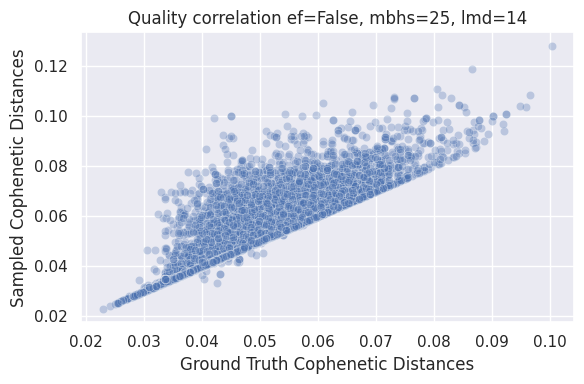

pearsonr took: 0.41314029693603516s
coph_dist took: 42.726080894470215s


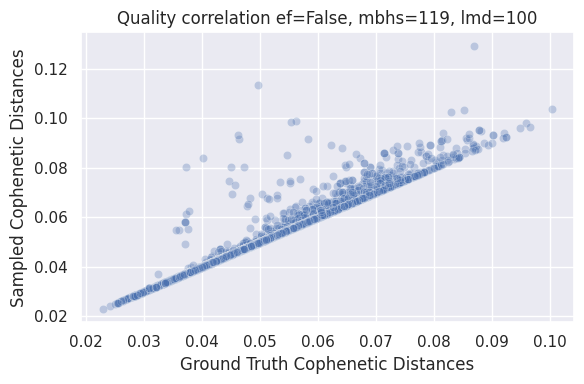

pearsonr took: 0.43056321144104004s
coph_dist took: 43.50317120552063s


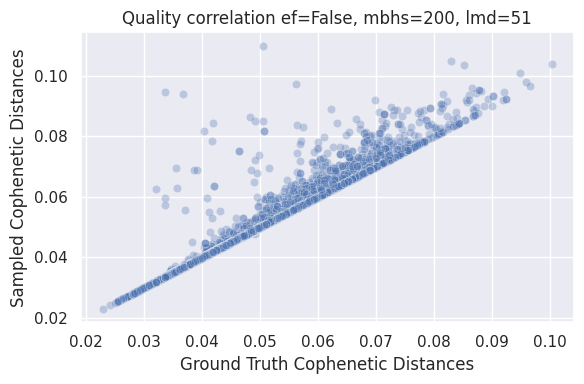

pearsonr took: 0.42702317237854004s
coph_dist took: 43.513609409332275s
pearsonr took: 0.42499518394470215s
coph_dist took: 43.181801319122314s
pearsonr took: 0.4199557304382324s
coph_dist took: 44.105534076690674s
pearsonr took: 0.4646267890930176s
coph_dist took: 42.961270332336426s
pearsonr took: 0.4222412109375s
coph_dist took: 43.383522510528564s
pearsonr took: 0.4233994483947754s
coph_dist took: 43.65512466430664s
pearsonr took: 0.42574596405029297s
coph_dist took: 43.35759496688843s
pearsonr took: 0.424389123916626s
coph_dist took: 43.00757932662964s
pearsonr took: 0.42462778091430664s
coph_dist took: 43.565656423568726s
pearsonr took: 0.4313788414001465s
coph_dist took: 43.33016586303711s
pearsonr took: 0.42466092109680176s


algo       time      n  \
0  HNSWkruskal  14.926692  70000   
1  HNSWkruskal  12.042342  70000   
2  HNSWkruskal  12.806381  70000   
3  HNSWkruskal  21.823968  70000   
4  HNSWkruskal  16.261517  70000   

                                              params  Pearson correlation  \
0  {"minPts": 1, "symmetric_expand": false, "para...             0.926751   
1  {"minPts": 1, "symmetric_expand": false, "para...             0.944872   
2  {"minPts": 1, "symmetric_expand": false, "para...             0.893422   
3  {"minPts": 1, "symmetric_expand": false, "para...             0.977469   
4  {"minPts": 1, "symmetric_expand": false, "para...             0.960755   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [45]:
## -- mnist-kruskal -- ##
import time
import itertools

dataset = 'mnist-70k'

se = [False]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

# Generate all combinations
combinations = list(itertools.product(se, mbhs, lmd))

data = []


temp = 0
for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWkruskal": continue
    params = json.loads(f.attrs["params"])
    
    if (params['symmetric_expand'],
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = np.sqrt(coph_dists[indices])

        temp += 1
        if temp <= 10:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=sampled_gt_coph_dists[0:10000], y=sampled_coph_dists[0:10000], alpha=0.3)
            plt.title(f"Quality correlation ef={params['symmetric_expand']}, mbhs={params['params']['max_build_heap_size']}, lmd={params['params']['lowest_max_degree']}")
            plt.xlabel("Ground Truth Cophenetic Distances")
            plt.ylabel("Sampled Cophenetic Distances")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_MNISTkruskal = pd.DataFrame(data=data)
df_MNISTkruskal.head(5)

coph_dist took: 43.387917041778564s


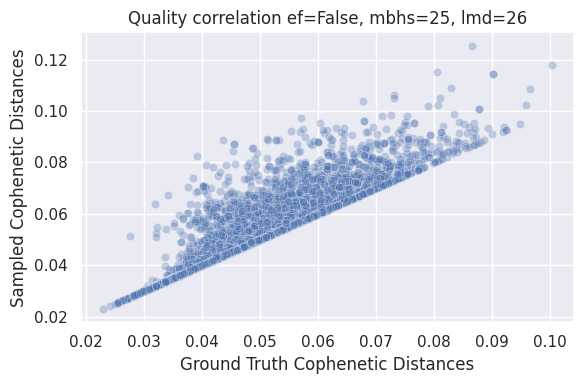

pearsonr took: 0.42455482482910156s
coph_dist took: 42.74675416946411s


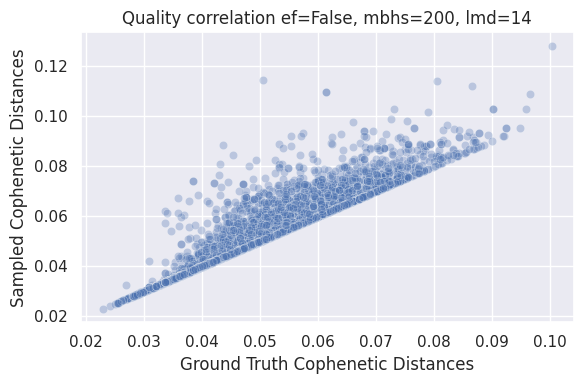

pearsonr took: 0.4189188480377197s
coph_dist took: 42.86259841918945s


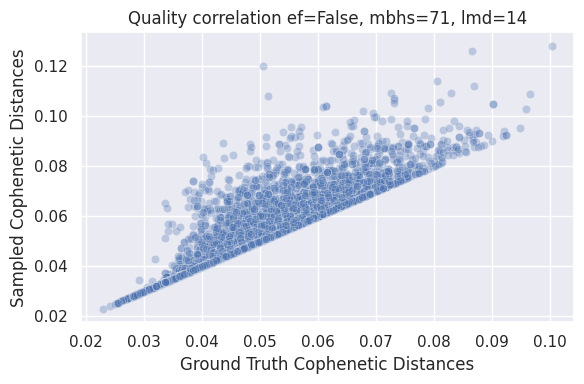

pearsonr took: 0.4205207824707031s
coph_dist took: 42.57549595832825s


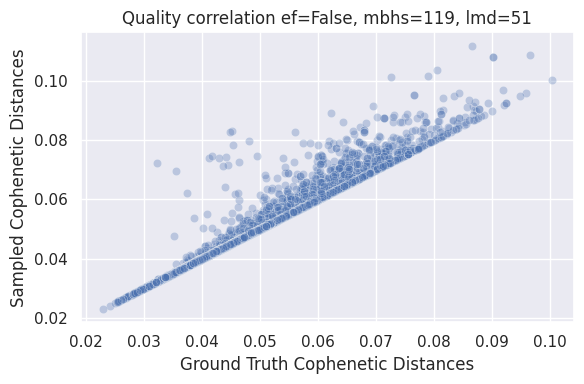

pearsonr took: 0.418304443359375s
coph_dist took: 43.3828022480011s


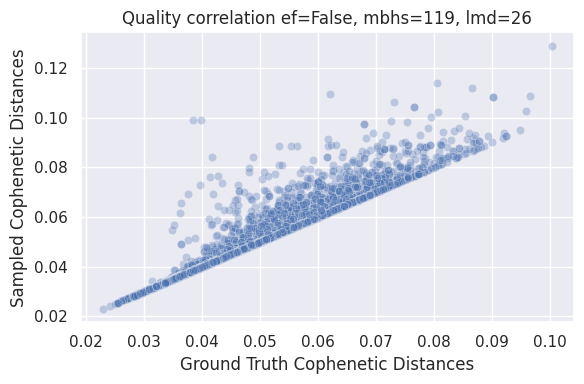

pearsonr took: 0.4170510768890381s
coph_dist took: 42.87383437156677s


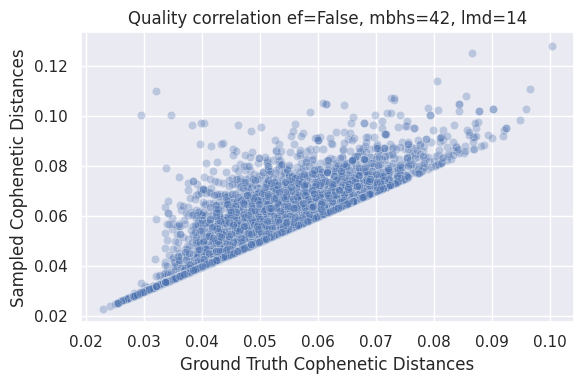

pearsonr took: 0.4238004684448242s
coph_dist took: 43.0150933265686s


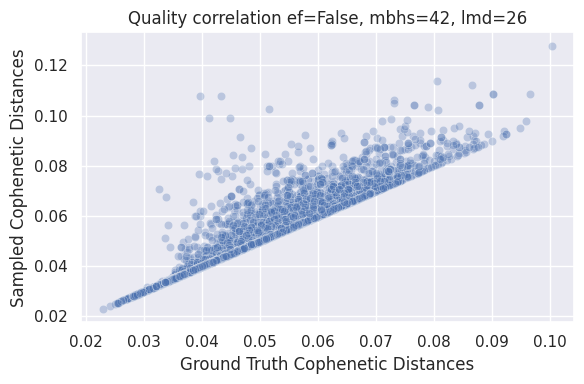

pearsonr took: 0.4278602600097656s
coph_dist took: 42.904457330703735s


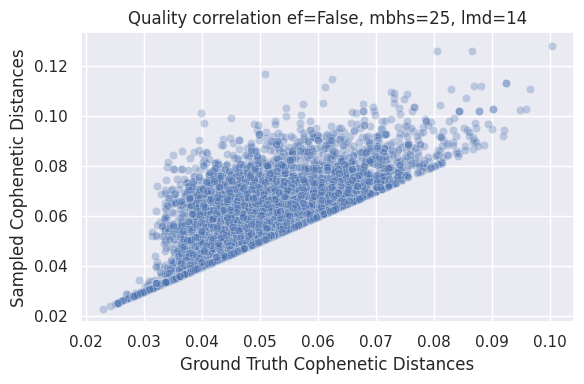

pearsonr took: 0.42276763916015625s
coph_dist took: 42.98590326309204s


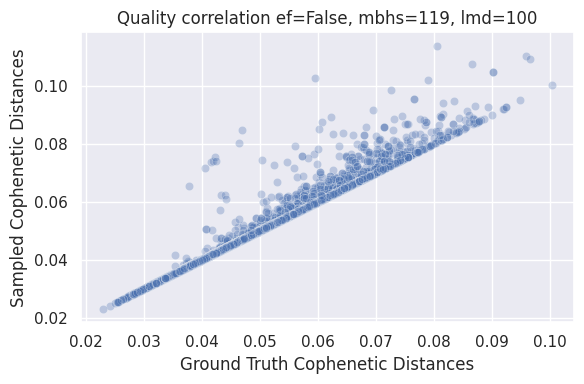

pearsonr took: 0.4214766025543213s
coph_dist took: 42.87339234352112s


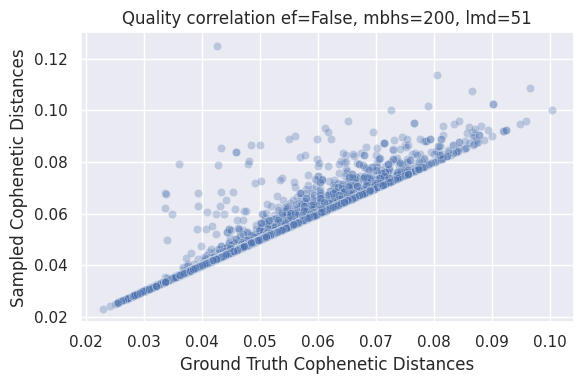

pearsonr took: 0.4203333854675293s
coph_dist took: 42.793094873428345s
pearsonr took: 0.41704726219177246s
coph_dist took: 42.66546177864075s
pearsonr took: 0.41850996017456055s
coph_dist took: 42.59066295623779s
pearsonr took: 0.41957974433898926s
coph_dist took: 42.47902011871338s
pearsonr took: 0.41886186599731445s
coph_dist took: 43.74186420440674s
pearsonr took: 0.4231600761413574s
coph_dist took: 43.019712686538696s
pearsonr took: 0.4308302402496338s
coph_dist took: 43.42272734642029s
pearsonr took: 0.4271852970123291s
coph_dist took: 43.112499952316284s
pearsonr took: 0.42158031463623047s
coph_dist took: 43.01898455619812s
pearsonr took: 0.42377710342407227s
coph_dist took: 42.719886302948s
pearsonr took: 0.42053961753845215s


algo      time      n  \
0  HNSWmst  1.623694  70000   
1  HNSWmst  2.608251  70000   
2  HNSWmst  1.541985  70000   
3  HNSWmst  4.270960  70000   
4  HNSWmst  2.883609  70000   

                                              params  Pearson correlation  \
0  {"minPts": 1, "symmetric_expand": false, "para...             0.917239   
1  {"minPts": 1, "symmetric_expand": false, "para...             0.938746   
2  {"minPts": 1, "symmetric_expand": false, "para...             0.904422   
3  {"minPts": 1, "symmetric_expand": false, "para...             0.975821   
4  {"minPts": 1, "symmetric_expand": false, "para...             0.962020   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [46]:
## -- mnist-mst -- ##
import time
import itertools

dataset = 'mnist-70k'

se = [False]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

# Generate all combinations
combinations = list(itertools.product(se, mbhs, lmd))

data = []


temp = 0
for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWmst": continue
    params = json.loads(f.attrs["params"])
    
    if (params['symmetric_expand'],
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = np.sqrt(coph_dists[indices])

        temp += 1
        if temp <= 10:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=sampled_gt_coph_dists[0:10000], y=sampled_coph_dists[0:10000], alpha=0.3)
            plt.title(f"Quality correlation ef={params['symmetric_expand']}, mbhs={params['params']['max_build_heap_size']}, lmd={params['params']['lowest_max_degree']}")
            plt.xlabel("Ground Truth Cophenetic Distances")
            plt.ylabel("Sampled Cophenetic Distances")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_MNISTmst = pd.DataFrame(data=data)
df_MNISTmst.head(5)

In [84]:
## -- blobs-10-5-hssl -- ##
import time
import itertools

dataset = 'blobs-32k-10-5'

ef = [5, 11, 22, 47, 100]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

combinations = list(itertools.product(ef, mbhs, lmd))

data = []


for f in load_all_results(dataset, ""):
    try:
        if f.attrs['algo'] != 'scipy': continue
        gt_dendro = f["dendrogram"][:]
        gt_dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in gt_dendro]
        gt_dendro = elki_sort_dendrogram(gt_dendro)
        start = time.time()
        gt_coph_dists = cophenet(gt_dendro)
        end = time.time()
        t = end - start
        print(f"gt_coph_dist took: {t}s")
    finally:
        f.close()
indices = np.random.choice(gt_coph_dists.shape[0], size=10_000_000, replace=False)


for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWhssl": continue
    params = json.loads(f.attrs["params"])
    
    if (params['ef'], 
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        # dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_blobs_10_5_hssl = pd.DataFrame(data=data)
df_blobs_10_5_hssl.head(5)

gt_coph_dist took: 9.225909948348999s
coph_dist took: 9.400093078613281s
pearsonr took: 0.40775394439697266s
coph_dist took: 8.964364767074585s
pearsonr took: 0.407123327255249s
coph_dist took: 9.024907112121582s
pearsonr took: 0.4034733772277832s
coph_dist took: 8.825970888137817s
pearsonr took: 0.46224451065063477s
coph_dist took: 8.872262716293335s
pearsonr took: 0.40417957305908203s
coph_dist took: 8.85895037651062s
pearsonr took: 0.3995685577392578s
coph_dist took: 9.21676230430603s
pearsonr took: 0.40061187744140625s
coph_dist took: 9.305354356765747s
pearsonr took: 0.400346040725708s
coph_dist took: 8.87943434715271s
pearsonr took: 0.4004175662994385s
coph_dist took: 8.742894887924194s
pearsonr took: 0.402970552444458s


algo        time      n  \
0  HNSWhssl  445.016544  32000   
1  HNSWhssl  350.248732  32000   
2  HNSWhssl  612.631667  32000   
3  HNSWhssl  210.319201  32000   
4  HNSWhssl  503.453785  32000   

                                              params  Pearson correlation  \
0  {"ef": 47, "params": {"higher_max_degree": 50,...             0.849025   
1  {"ef": 47, "params": {"higher_max_degree": 50,...             0.852632   
2  {"ef": 100, "params": {"higher_max_degree": 50...             0.983014   
3  {"ef": 22, "params": {"higher_max_degree": 50,...             0.998556   
4  {"ef": 100, "params": {"higher_max_degree": 50...             0.998475   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [85]:
## -- blobs-10-5-kruskal -- ##
import time
import itertools

dataset = 'blobs-32k-10-5'

se = [False]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

# Generate all combinations
combinations = list(itertools.product(se, mbhs, lmd))

data = []

for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWkruskal": continue
    params = json.loads(f.attrs["params"])
    
    if (params['symmetric_expand'],
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        # dendro = elki_sort_dendrogram(dendro)

        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_blobs_10_5_kruskal = pd.DataFrame(data=data)
df_blobs_10_5_kruskal.head(5)

coph_dist took: 9.447592496871948s
pearsonr took: 0.3988218307495117s
coph_dist took: 9.281531572341919s
pearsonr took: 0.40618109703063965s
coph_dist took: 8.97466492652893s
pearsonr took: 0.40020132064819336s
coph_dist took: 8.871080160140991s
pearsonr took: 0.4007265567779541s
coph_dist took: 9.197433233261108s
pearsonr took: 0.40593600273132324s
coph_dist took: 9.201327562332153s
pearsonr took: 0.3999614715576172s
coph_dist took: 9.17061161994934s
pearsonr took: 0.4645700454711914s
coph_dist took: 8.953531265258789s
pearsonr took: 0.4016399383544922s
coph_dist took: 9.024509906768799s
pearsonr took: 0.40558719635009766s
coph_dist took: 9.282717943191528s
pearsonr took: 0.40076112747192383s
coph_dist took: 8.772345542907715s
pearsonr took: 0.40030837059020996s
coph_dist took: 9.102638959884644s
pearsonr took: 0.39815187454223633s


algo      time      n  \
0  HNSWkruskal  5.252005  32000   
1  HNSWkruskal  4.776173  32000   
2  HNSWkruskal  4.336304  32000   
3  HNSWkruskal  3.964996  32000   
4  HNSWkruskal  5.948035  32000   

                                              params  Pearson correlation  \
0  {"minPts": 1, "symmetric_expand": false, "para...             0.625026   
1  {"minPts": 1, "symmetric_expand": false, "para...             0.710128   
2  {"minPts": 1, "symmetric_expand": false, "para...             0.996772   
3  {"minPts": 1, "symmetric_expand": false, "para...             0.644734   
4  {"minPts": 1, "symmetric_expand": false, "para...             0.816870   

   pval  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [87]:
## -- blobs-10-5-mst -- ##
import time
import itertools

dataset = 'blobs-32k-10-5'

se = [False]
mbhs = [25, 42, 71, 119, 200]
lmd = [14, 26, 51, 100]

# Generate all combinations
combinations = list(itertools.product(se, mbhs, lmd))

data = []

for f in load_all_results(dataset, ""):
    if f.attrs['algo'] != "HNSWmst": continue
    params = json.loads(f.attrs["params"])
    
    if (params['symmetric_expand'],
        params['params']['max_build_heap_size'], 
        params['params']['lowest_max_degree']) not in combinations: continue
    try:
        print(f["dendrogram"][:])
        dendro = [[int(l), int(r), float(d), int(s)] for l, r, d, s in f["dendrogram"][:]]
        # dendro = elki_sort_dendrogram(dendro)
        print(len(dendro))
        start = time.time()
        coph_dists = cophenet(dendro)
        end = time.time()
        t = end - start
        print(f"coph_dist took: {t}s")

        # sample_fraction = 0.2
        # sample_size = int(len(coph_dists) * sample_fraction)
        sampled_gt_coph_dists = gt_coph_dists[indices]
        sampled_coph_dists = coph_dists[indices]

        start = time.time()
        # coph_coeff = pd.DataFrame(pd.Series(gt_coph_dists)).corrwith(pd.Series(coph_dists), method="spearman")[0]
        pear_corr, p_val = pearsonr(sampled_gt_coph_dists, sampled_coph_dists)
        # print(np.linalg.norm(gt_coph_dists - coph_dists) / len(gt_coph_dists))
        end = time.time()
        t = end - start
        print(f"pearsonr took: {t}s")

        data.append({
        "algo": f.attrs['algo'],
        "time": f.attrs['time'],
        "n": len(f["dendrogram"][:]) + 1,
        "params": f.attrs["params"],
        "Pearson correlation": pear_corr,
        "pval": p_val,
        })
    finally:
        f.close()

df_blobs_10_5_mst = pd.DataFrame(data=data)
df_blobs_10_5_mst.head(5)

[[1.09150000e+04 2.44350000e+04 3.81914020e-01 2.00000000e+00]
 [1.26900000e+03 5.41600000e+03 3.87462288e-01 2.00000000e+00]
 [1.86450000e+04 1.96140000e+04 3.89435738e-01 2.00000000e+00]
 ...
 [6.39950000e+04 2.29170000e+04 3.97751160e+02 1.91990000e+04]
 [1.67090000e+04 6.39960000e+04 4.39734589e+02 1.92000000e+04]
 [6.39970000e+04 6.39880000e+04 5.76570190e+02 3.20000000e+04]]
31999
coph_dist took: 9.383590936660767s
pearsonr took: 0.4015030860900879s
[[2.00400000e+04 2.59500000e+04 2.72180170e-01 2.00000000e+00]
 [9.42400000e+03 9.62300000e+03 3.62798512e-01 2.00000000e+00]
 [3.83400000e+03 3.85000000e+03 3.75571549e-01 2.00000000e+00]
 ...
 [6.39950000e+04 7.15000000e+02 4.01761292e+02 1.29790000e+04]
 [6.38550000e+04 6.39960000e+04 4.29971527e+02 1.92000000e+04]
 [6.39970000e+04 6.39220000e+04 6.11333801e+02 3.20000000e+04]]
31999
coph_dist took: 8.842024087905884s
pearsonr took: 0.4021036624908447s
[[9.42400000e+03 9.62300000e+03 3.62798512e-01 2.00000000e+00]
 [3.83400000e+03 

ValueError: Linkage 'Z' uses non-singleton cluster before it is formed.

In [25]:
df_ALOIhssl["params_dict"] = df_ALOIhssl["params"].apply(lambda x: json.loads(x))
df_ef = df_ALOIhssl["params_dict"].apply(lambda d: d.get("ef")).rename("ef").to_frame()
df_params = df_ALOIhssl["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_ALOIhssl, df_ef[['ef']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_hssl = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "ef", "max_build_heap_size", "lowest_max_degree"]]

filtered_df = df_hssl[df_hssl["Pearson correlation"] > 0.8]
costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

top_5_pareto[["time", "Pearson correlation", "ef", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  ef  max_build_heap_size  \
19  214.661385             0.805471   5                   25   

    lowest_max_degree  
19                 26

In [26]:
df_ALOIkruskal["params_dict"] = df_ALOIkruskal["params"].apply(lambda x: json.loads(x))
df_ef = df_ALOIkruskal["params_dict"].apply(lambda d: d.get("symmetric_expand")).rename("symmetric_expand").to_frame()
df_params = df_ALOIkruskal["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_ALOIkruskal, df_ef[['symmetric_expand']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_kruskal = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

filtered_df = df_kruskal[df_kruskal["Pearson correlation"] > 0.8]
costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

top_5_pareto[["time", "Pearson correlation", "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  symmetric_expand  max_build_heap_size  \
12  32.216799             0.843451             False                   42   

    lowest_max_degree  
12                100

In [27]:
df_ALOImst["params_dict"] = df_ALOImst["params"].apply(lambda x: json.loads(x))
df_ef = df_ALOImst["params_dict"].apply(lambda d: d.get("symmetric_expand")).rename("symmetric_expand").to_frame()
df_params = df_ALOImst["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_ALOImst, df_ef[['symmetric_expand']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_mst = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

filtered_df = df_mst[df_mst["Pearson correlation"] > 0.8]
costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

top_5_pareto[["time", "Pearson correlation", "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  symmetric_expand  max_build_heap_size  \
18  1.849591             0.805491             False                   25   

    lowest_max_degree  
18                 51

In [28]:
df_MNISThssl["params_dict"] = df_MNISThssl["params"].apply(lambda x: json.loads(x))
df_ef = df_MNISThssl["params_dict"].apply(lambda d: d.get("ef")).rename("ef").to_frame()
df_params = df_MNISThssl["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_MNISThssl, df_ef[['ef']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_hssl = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "ef", "max_build_heap_size", "lowest_max_degree"]]

filtered_df = df_hssl[df_hssl["Pearson correlation"] > 0.8]
costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

top_5_pareto[["time", "Pearson correlation", "ef", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  ef  max_build_heap_size  lowest_max_degree
22  88.058956             0.824893   5                   25                 14

In [29]:
df_MNISTkruskal["params_dict"] = df_MNISTkruskal["params"].apply(lambda x: json.loads(x))
df_ef = df_MNISTkruskal["params_dict"].apply(lambda d: d.get("symmetric_expand")).rename("symmetric_expand").to_frame()
df_params = df_MNISTkruskal["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_MNISTkruskal, df_ef[['symmetric_expand']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_kruskal = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

filtered_df = df_kruskal[df_kruskal["Pearson correlation"] > 0.8]
costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

top_5_pareto[["time", "Pearson correlation", "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  symmetric_expand  max_build_heap_size  \
15  11.656641             0.899564             False                  119   

    lowest_max_degree  
15                 14

In [30]:
df_MNISTmst["params_dict"] = df_MNISTmst["params"].apply(lambda x: json.loads(x))
df_ef = df_MNISTmst["params_dict"].apply(lambda d: d.get("symmetric_expand")).rename("symmetric_expand").to_frame()
df_params = df_MNISTmst["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_MNISTmst, df_ef[['symmetric_expand']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_mst = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

filtered_df = df_mst[df_mst["Pearson correlation"] > 0.8]
costs = np.column_stack((-filtered_df["Pearson correlation"].values, filtered_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = filtered_df[mask]

top_5_pareto = pareto_df[pareto_df.time == pareto_df.time.min()]

top_5_pareto[["time", "Pearson correlation", "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

time  Pearson correlation  symmetric_expand  max_build_heap_size  \
5  1.305808             0.848082             False                   42   

   lowest_max_degree  
5                 14

In [31]:
df_hssl.to_csv('MNISThssl.csv', index=False)
df_kruskal.to_csv('MNISTkruskal.csv', index=False)
df_mst.to_csv('MNISTmst.csv', index=False)

In [32]:
df_MNISThssl["params_dict"] = df_MNISThssl["params"].apply(lambda x: json.loads(x))
df_ef = df_MNISThssl["params_dict"].apply(lambda d: d.get("ef")).rename("ef").to_frame()
df_params = df_MNISThssl["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_MNISThssl, df_ef[['ef']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_hssl = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "ef", "max_build_heap_size", "lowest_max_degree"]]

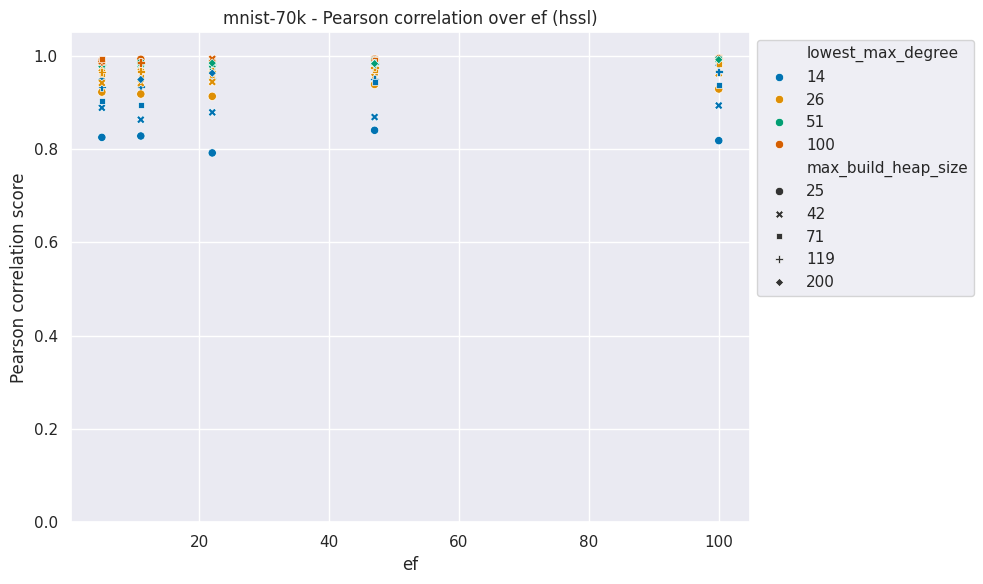

In [33]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))
# [df_tmp["max_build_heap_size"] == 42]
sns.scatterplot(data=df_tmp, x="ef", y="Pearson correlation",
                hue="lowest_max_degree",
                style="max_build_heap_size",
                palette="colorblind",
                )

plt.title(f"{dataset} - Pearson correlation over ef (hssl)" )
plt.xlabel("ef")
plt.ylabel("Pearson correlation score")
plt.ylim(0, 1.05)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

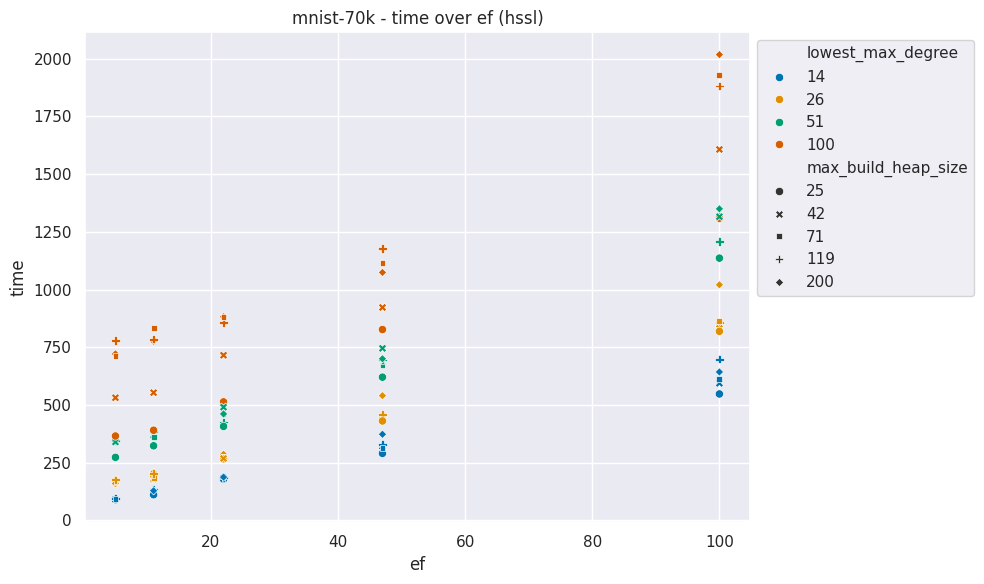

In [34]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmp, x="ef", y="time",
                hue="lowest_max_degree",
                style="max_build_heap_size",
                palette="colorblind",
                )

plt.title(f"{dataset} - time over ef (hssl)")
plt.xlabel("ef")
plt.ylabel("time")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
df_MNISTkruskal["params_dict"] = df_MNISTkruskal["params"].apply(lambda x: json.loads(x))
df_params = df_MNISTkruskal["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_MNISTkruskal, df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_kruskal = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "max_build_heap_size", "lowest_max_degree"]]

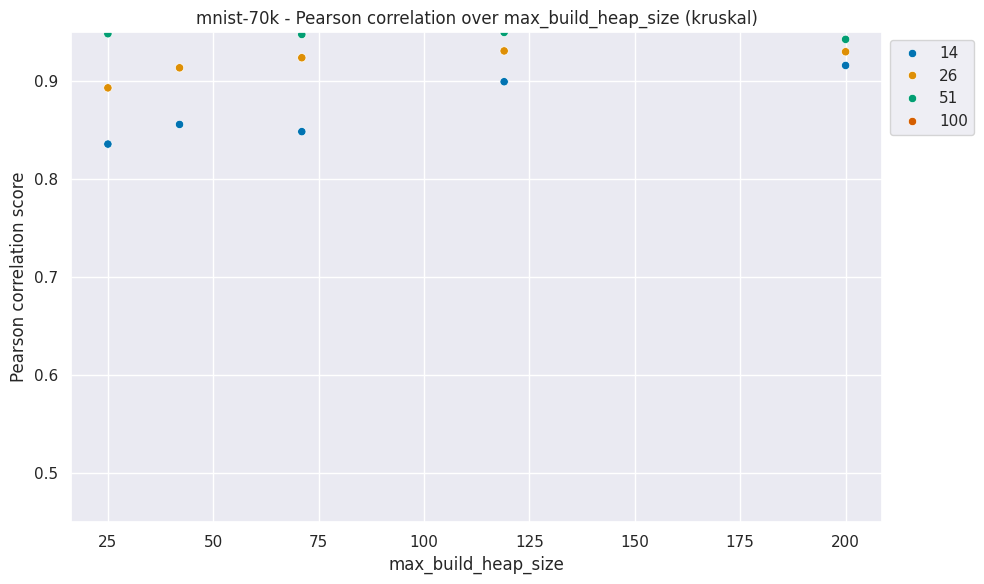

In [36]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))
# [df_tmp["max_build_heap_size"] == 42]
sns.scatterplot(data=df_tmp, x="max_build_heap_size", y="Pearson correlation",
                hue="lowest_max_degree",
                palette="colorblind",
                )

plt.title(f"{dataset} - Pearson correlation over max_build_heap_size (kruskal)")
plt.xlabel("max_build_heap_size")
plt.ylabel("Pearson correlation score")
plt.ylim(0.45, 0.95)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

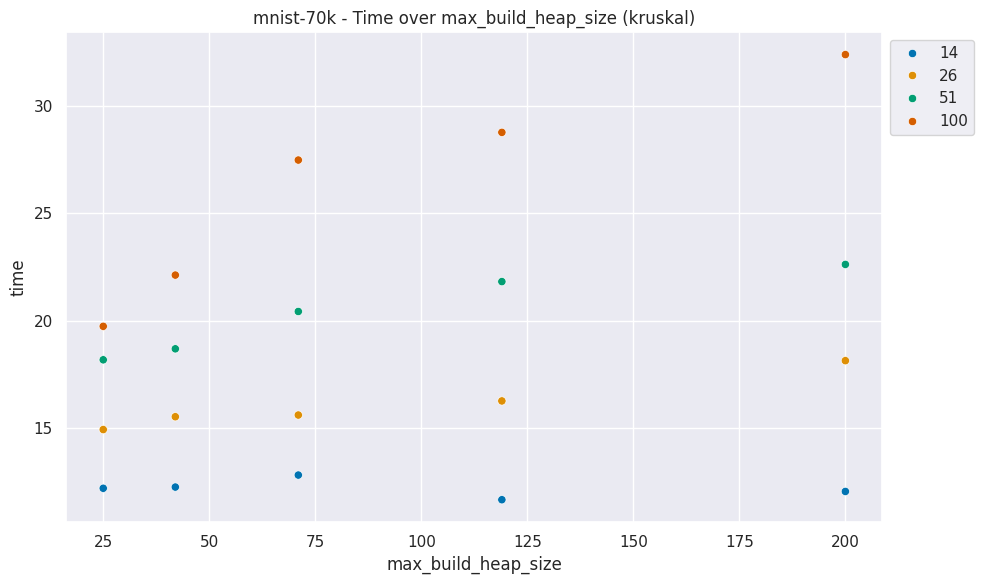

In [37]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))
# [df_tmp["max_build_heap_size"] == 42]
sns.scatterplot(data=df_tmp, x="max_build_heap_size", y="time",
                hue="lowest_max_degree",
                palette="colorblind",
                )

plt.title(f"{dataset} - Time over max_build_heap_size (kruskal)")
plt.xlabel("max_build_heap_size")
plt.ylabel("time")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
df_MNISTmst["params_dict"] = df_MNISTmst["params"].apply(lambda x: json.loads(x))
df_params = df_MNISTmst["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
df_tmp = pd.concat([df_MNISTmst, df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

df_mst = df_tmp[["algo", "time", "n", 
                "Pearson correlation", "pval", 
                "max_build_heap_size", "lowest_max_degree"]]

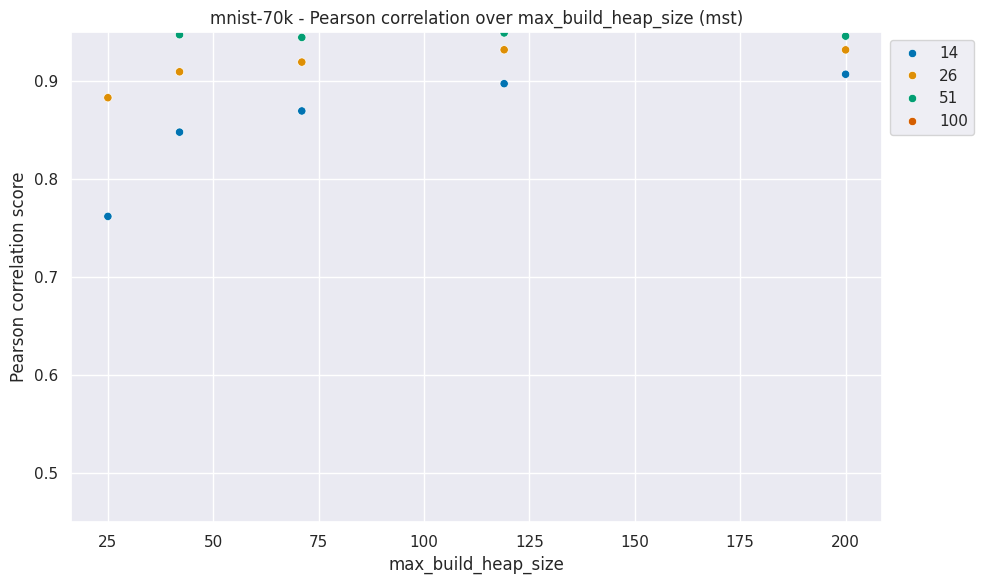

In [39]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))
# [df_tmp["max_build_heap_size"] == 42]
sns.scatterplot(data=df_tmp, x="max_build_heap_size", y="Pearson correlation",
                hue="lowest_max_degree",
                palette="colorblind",
                )

plt.title(f"{dataset} - Pearson correlation over max_build_heap_size (mst)")
plt.xlabel("max_build_heap_size")
plt.ylabel("Pearson correlation score")
plt.ylim(0.45, 0.95)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

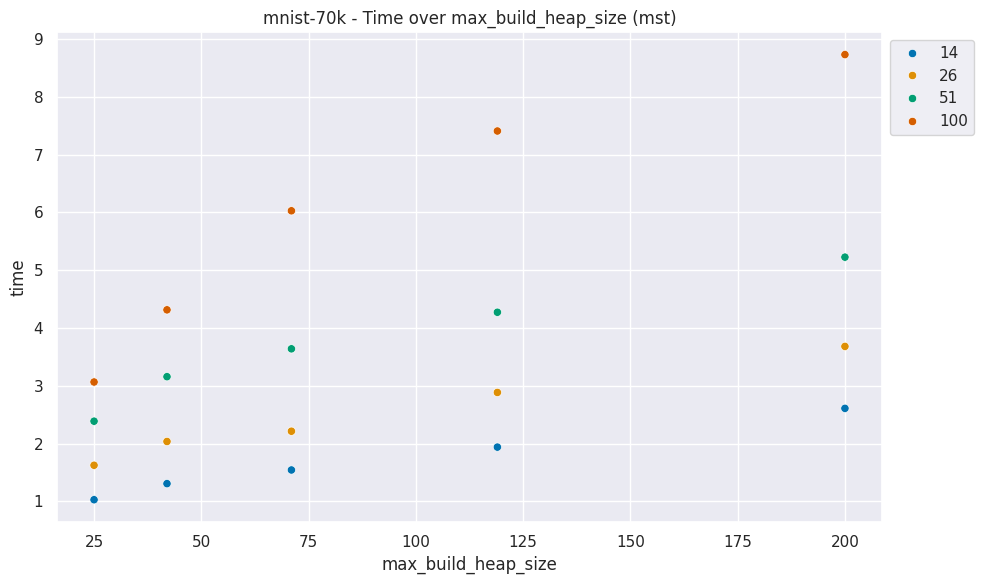

In [40]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))
# [df_tmp["max_build_heap_size"] == 42]
sns.scatterplot(data=df_tmp, x="max_build_heap_size", y="time",
                hue="lowest_max_degree",
                palette="colorblind",
                )

plt.title(f"{dataset} - Time over max_build_heap_size (mst)")
plt.xlabel("max_build_heap_size")
plt.ylabel("time")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## HNSW Kruskal-style 

In [43]:
# datasets, min_cluster_size, k_override = ['aloi-50k'], 1, 1_000
# datasets, min_cluster_size, k_override = ['blobs-32k-10-5'], 50, None
# datasets, min_cluster_size, k_override = ['blobs-32k-5-100'], 500, None
datasets, min_cluster_size, k_override = ['mnist'], 500, None

data = []
exact_data = {}



for dataset in datasets:
    for f in load_all_results(dataset, ""):
        if f.attrs['algo'] == 'scipy':
            exact_data[dataset] = f["dendrogram"][:]
            break


for dataset in datasets:
    # load all the results that are available for the dataset
    for f in load_all_results(dataset, ""):
        if f.attrs['algo'] == "HNSWkruskal":
            try:
                ARI = ARI_score(exact_data[dataset], f["dendrogram"][:], min_cluster_size=min_cluster_size, k_override=k_override)
                data.append({
                "algo": f.attrs['algo'],
                "time": f.attrs['time'],
                "n": len(f["dendrogram"][:]) + 1,
                "params": f.attrs["params"],
                "ARI": ARI
                })
            finally:
                f.close()

df = pd.DataFrame(data=data)
df

Empty DataFrame
Columns: []
Index: []

In [44]:
if 'symmetric_expand' and 'lowest_max_degree' and 'max_build_heap_size' not in df.columns:
    df["params_dict"] = df["params"].apply(lambda x: json.loads(x))
    df_ef = df["params_dict"].apply(lambda d: d.get("symmetric_expand")).rename("symmetric_expand").to_frame()
    df_params = df["params_dict"].apply(lambda d: d.get("params", {})).apply(pd.Series)
    plot_df = pd.concat([df, df_ef[['symmetric_expand']], df_params[["lowest_max_degree", "max_build_heap_size"]]], axis=1)

plot_df["lowest_max_degree <= 26"] = plot_df["lowest_max_degree"] <= 26
plot_df["max_build_heap_size <= 42"] = plot_df["max_build_heap_size"] <= 42

sns.set(style="darkgrid")
ax = plt.figure(figsize=(10, 6))


sns.scatterplot(data=plot_df, x="time", y="ARI", 
                hue="lowest_max_degree <= 26", 
                style="max_build_heap_size <= 42", 
                size="symmetric_expand", 
                palette="colorblind", 
                markers={True: "X", False: "o"},
                sizes=(50, 200),
                alpha=0.7)


plt.title(f"{dataset} - ARI over time")
plt.xlabel("Time [s]")
plt.ylabel("ARI score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
# plt.xscale("log")

plt.show()

KeyError: 'params'

In [ ]:
costs = np.column_stack((-plot_df["ARI"].values, plot_df["time"].values))

mask = is_pareto_efficient(costs)
pareto_df = plot_df[mask]
pareto_df = pareto_df[pareto_df["ARI"] > 0.5]

top_5_pareto = pareto_df.head(5)

top_5_pareto[["time", "ARI", "symmetric_expand", "max_build_heap_size", "lowest_max_degree"]]

time       ARI  symmetric_expand  max_build_heap_size  \
27   6.169432  0.942305             False                  119   
32   5.024386  0.653863             False                   71   
33  23.045304  0.988234              True                  119   
38   5.331991  0.798930             False                   42   
45   7.650510  0.974377             False                  200   

    lowest_max_degree  
27                100  
32                 72  
33                100  
38                100  
45                100

In [ ]:
a = 2

print(a not in range(1, 2))

True


## Plotly plotting

In [ ]:
# datasets, min_cluster_size, k_override = ['blobs-32k-10-5'], 10, None
datasets, min_cluster_size, k_override = ['aloi-50k'], 1, 1_000

data = []
exact_data = {}


for dataset in datasets:
    fs = list(load_all_results(dataset, ""))
    try:
        for f in fs:
            if f.attrs['algo'] == 'scipy':
                exact_data[dataset] = f["dendrogram"][:]
                break
        else:
            print(f"Failed to find scipy solution for {dataset}")
            continue
        for f in fs:
            # print(f.attrs["algo"])
            if f.attrs['algo'] in ["HNSWhssl", "HNSWhdbscan"]:
                if "time_proc" not in f.attrs: continue
                ari = ARI_score(
                    exact_data[dataset],
                    f["dendrogram"][:],
                    min_cluster_size=min_cluster_size,
                    k_override=k_override
                )
                data.append({
                    "algo": f.attrs['algo'],
                    "time": f.attrs['time'],
                    "time_proc": f.attrs['time_proc'],
                    "n": len(f["dendrogram"][:]) + 1,
                    "params": f.attrs["params"],
                    "ARI": ari,
                })
    finally:
        for f in fs:
            try: f.close()
            except:
                print(f"Warning: Closing file {f} failed.")

df = pd.DataFrame(data=data)
df

In [ ]:
import plotly.graph_objects as go
make_parts = lambda name: [name,
    *df.loc[df["algo"]==name][["time_proc","ARI","params"]].to_numpy().T,
]
go.Figure([
    go.Scatter(
        x=times,
        y=aris,
        mode="markers",
        text=texts,
        name=name,
    )
    for name, times, aris, texts in [
        make_parts("HNSWhssl"), make_parts("HNSWhdbscan")
    ]
], layout=dict(
    xaxis_title="time [s]",
    yaxis_title="ARI",
    xaxis_type="log",
    yaxis_type="log",
))